I.LES BIBLIOTHÈQUES

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import numpy as np
from scipy.stats import chi2_contingency

                            I.Importation et nettoyage des données

                    Affichage des entetes

In [85]:

credit = pd.read_csv("credit.csv", sep=";")
# Affichage des premières lignes
print("\tAperçus du jour\n")
print(credit.head())


	Aperçus du jour

       Marche      Apport      Impaye       Assurance Endettement  \
0  Renovation  pas_Apport       Imp_0             AID       End_1   
1  Renovation  pas_Apport       Imp_0  Sans Assurance       End_2   
2     Voiture      Apport       Imp_0             AID       End_3   
3  Renovation  pas_Apport       Imp_0          Senior       End_2   
4     Scooter      Apport  Imp_3 et +             AID       End_4   

       Famille Enfants                 Logement            Profession  \
0  Union libre   Enf_0      Loge par la famille  Ouvrier non qualifie   
1        Marie   Enf_0             Proprietaire      Ouvrier qualifie   
2        Marie   Enf_1  Accedant a la propriete      Ouvrier qualifie   
3         Veuf   Enf_0             Proprietaire              Retraite   
4  Union libre   Enf_0     Loge par l'employeur           Cadre moyen   

  Intitule  Age  
0       MR   50  
1       MR   40  
2       MR   30  
3       MR   60  
4       MR   20  


TYPES DE DONNEES

In [72]:
#type de données

print("\n\tTypes de données\n")
print(credit.dtypes)



	Types de données

Marche         object
Apport         object
Impaye         object
Assurance      object
Endettement    object
Famille        object
Enfants        object
Logement       object
Profession     object
Intitule       object
Age             int64
dtype: object


VERIFICATION DES DOUBLONS

Vérification des valeurs manquantes

In [86]:
# Analyse des valeurs manquantes
credit.isnull().sum()

Marche         0
Apport         0
Impaye         0
Assurance      0
Endettement    0
Famille        0
Enfants        0
Logement       0
Profession     0
Intitule       0
Age            0
dtype: int64

Description des variables de la base de données

In [87]:

# Description de la base de données
print("\t\n Description de la base de données\n")
credit.describe(include='all')

	
 Description de la base de données



,Marche,Apport,Impaye,Assurance,Endettement,Famille,Enfants,Logement,Profession,Intitule,Age
count,66,66,66,66,66,66,66,66,66,66,66.000000
unique,6,2,3,4,4,5,5,5,5,3,NaN
top,Renovation,Apport,Imp_0,AID,End_3,Marie,Enf_0,Proprietaire,Ouvrier qualifie,MR,NaN
freq,18,35,42,31,19,25,39,28,18,53,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.393939
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.686466
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000


In [88]:
# Analyse des doublons
# Vérification des doublons
duplicates = credit.duplicated().sum()
print("\n\tNombre de ligne dupliquée est : ", duplicates)


	Nombre de ligne dupliquée est :  0


In [77]:
# La variable age est de type quantitative
# Transformation de la variable catégorielles age en qualitative

# Definir les bornes pour les classes d'âge
bins = [19, 29, 39, 49, 59, 69, 79, 100]
# Definir les étiquettes pour les classes d'âge
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
# Créer une nouvelle colonne 'age_group' avec les classes d'âge
credit['ages_group'] = pd.cut(credit['Age'], bins=bins, labels=labels, right=False)
# Afficher les premières lignes pour vérifier la nouvelle colonne
print("\n\tAperçus du jour avec la nouvelle colonne 'ages_group'\n")
print(credit.head())


	Aperçus du jour avec la nouvelle colonne 'ages_group'

       Marche      Apport      Impaye       Assurance Endettement  \
0  Renovation  pas_Apport       Imp_0             AID       End_1   
1  Renovation  pas_Apport       Imp_0  Sans Assurance       End_2   
2     Voiture      Apport       Imp_0             AID       End_3   
3  Renovation  pas_Apport       Imp_0          Senior       End_2   
4     Scooter      Apport  Imp_3 et +             AID       End_4   

       Famille Enfants                 Logement            Profession  \
0  Union libre   Enf_0      Loge par la famille  Ouvrier non qualifie   
1        Marie   Enf_0             Proprietaire      Ouvrier qualifie   
2        Marie   Enf_1  Accedant a la propriete      Ouvrier qualifie   
3         Veuf   Enf_0             Proprietaire              Retraite   
4  Union libre   Enf_0     Loge par l'employeur           Cadre moyen   

  Intitule  Age ages_group  
0       MR   50      50-59  
1       MR   40      40-49  
2 

                        ANALYSES UNIVARIÉES DES VARIABLES

Analyse de manière unique chaque variable

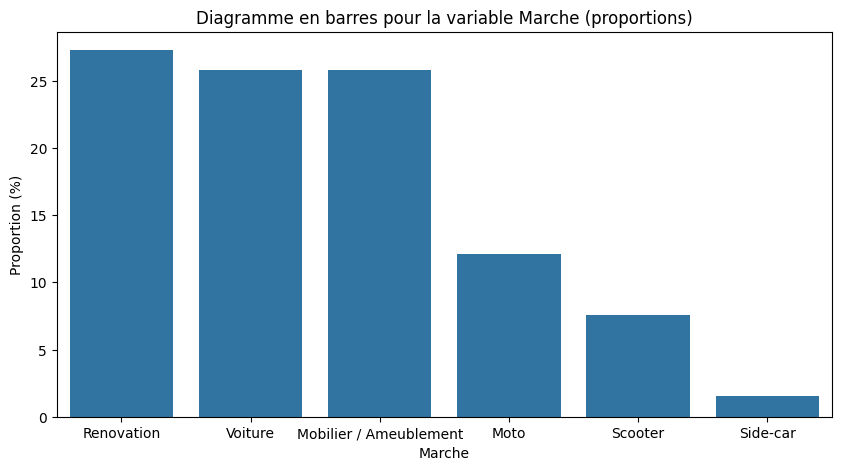

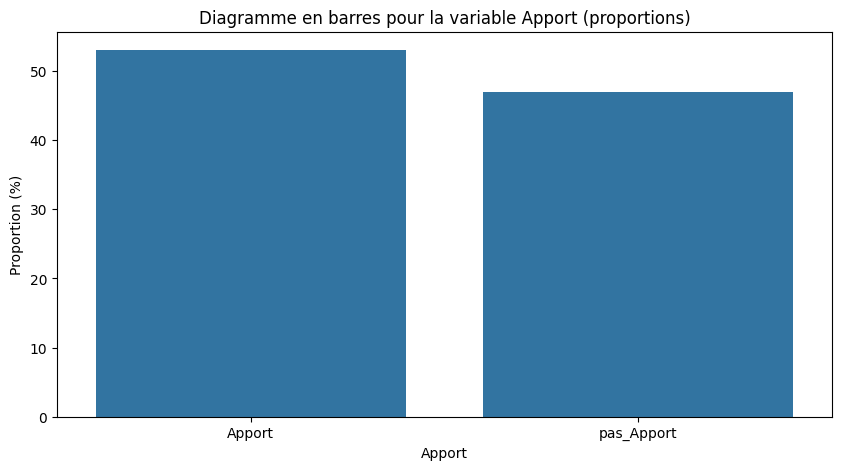

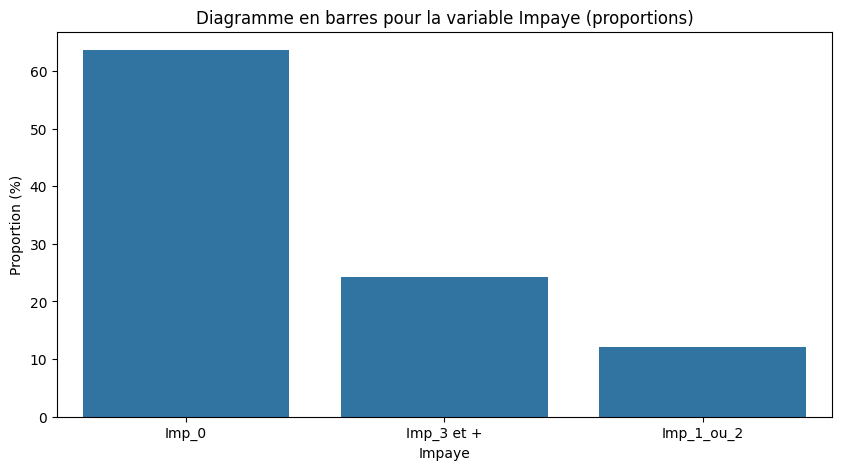

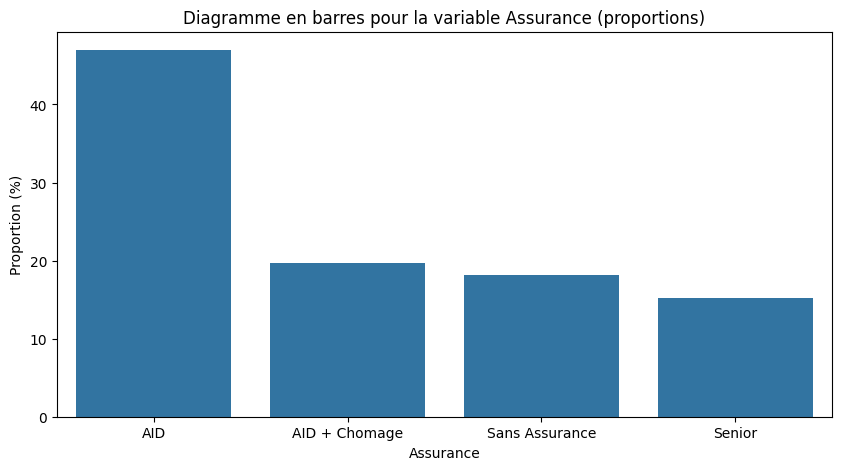

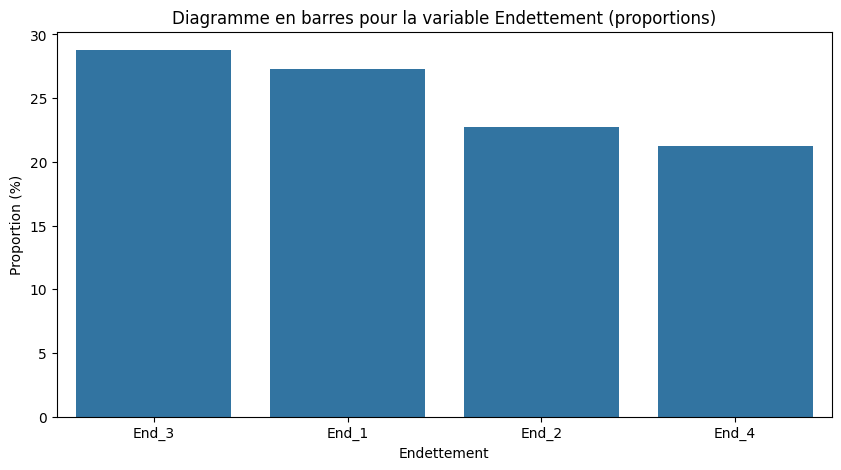

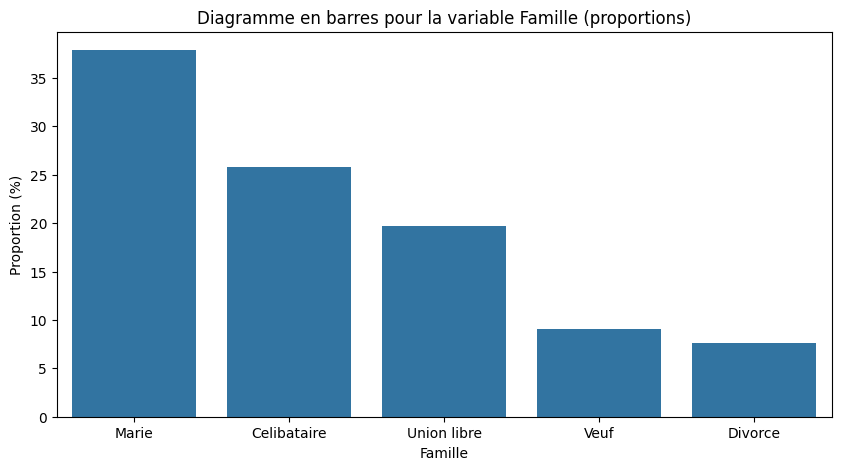

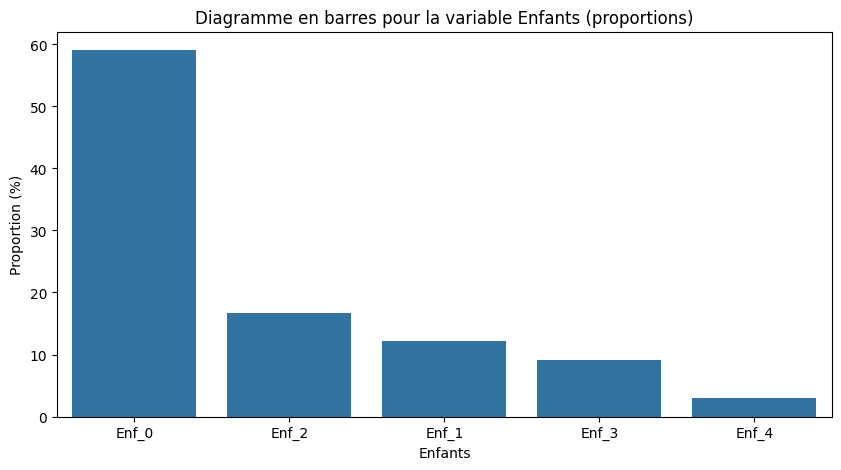

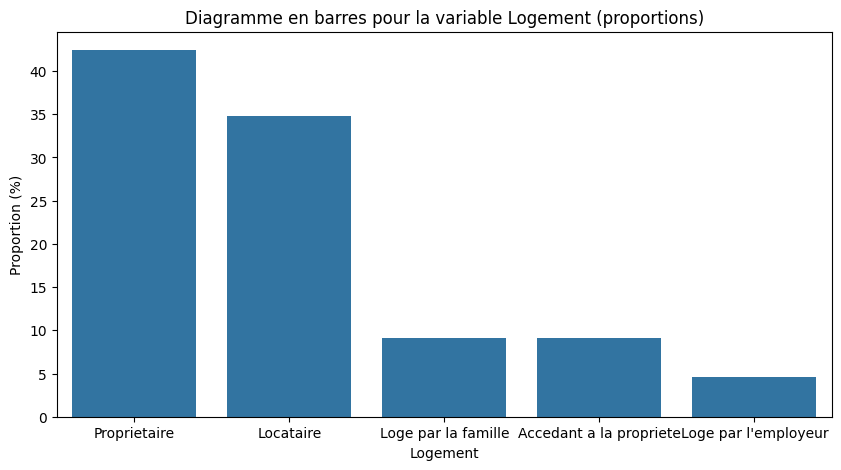

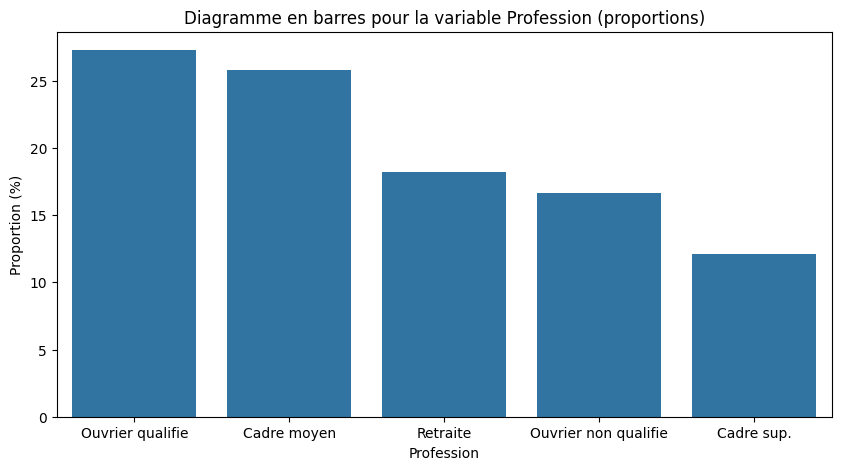

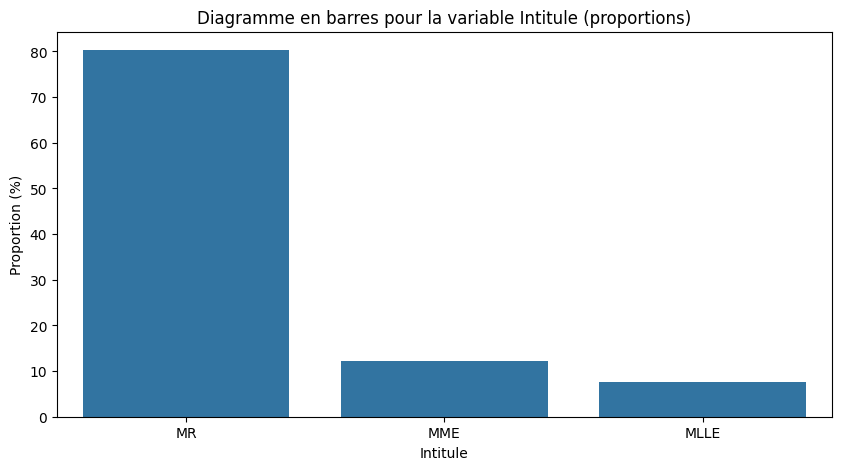

In [78]:
# Affichage des variables catégorielles
# Liste des variables catégorielles
categorical_columns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']

# Création des graphiques pour chaque variable catégorielle en terme de proportion
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    proportions = credit[column].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {column} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

Fréquence des variables

In [93]:


# Liste des variables catégorielles
categorical_columsns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']
for columns in categorical_columns:
    print(f"\nFréquences de la variable {columns}:")
    print(credit[columns].value_counts())



Fréquences de la variable Marche:
Marche
Renovation                18
Voiture                   17
Mobilier / Ameublement    17
Moto                       8
Scooter                    5
Side-car                   1
Name: count, dtype: int64

Fréquences de la variable Apport:
Apport
Apport        35
pas_Apport    31
Name: count, dtype: int64

Fréquences de la variable Impaye:
Impaye
Imp_0         42
Imp_3 et +    16
Imp_1_ou_2     8
Name: count, dtype: int64

Fréquences de la variable Assurance:
Assurance
AID               31
AID + Chomage     13
Sans Assurance    12
Senior            10
Name: count, dtype: int64

Fréquences de la variable Endettement:
Endettement
End_3    19
End_1    18
End_2    15
End_4    14
Name: count, dtype: int64

Fréquences de la variable Famille:
Famille
Marie          25
Celibataire    17
Union libre    13
Veuf            6
Divorce         5
Name: count, dtype: int64

Fréquences de la variable Enfants:
Enfants
Enf_0    39
Enf_2    11
Enf_1     8
Enf_3     6
E

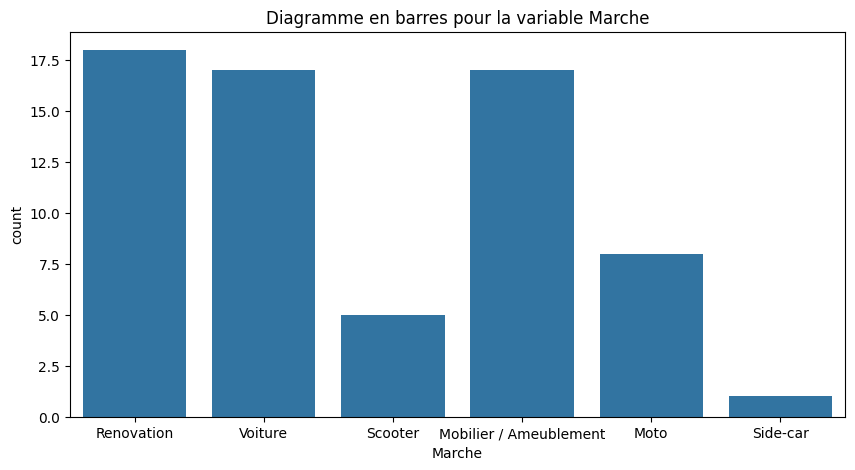

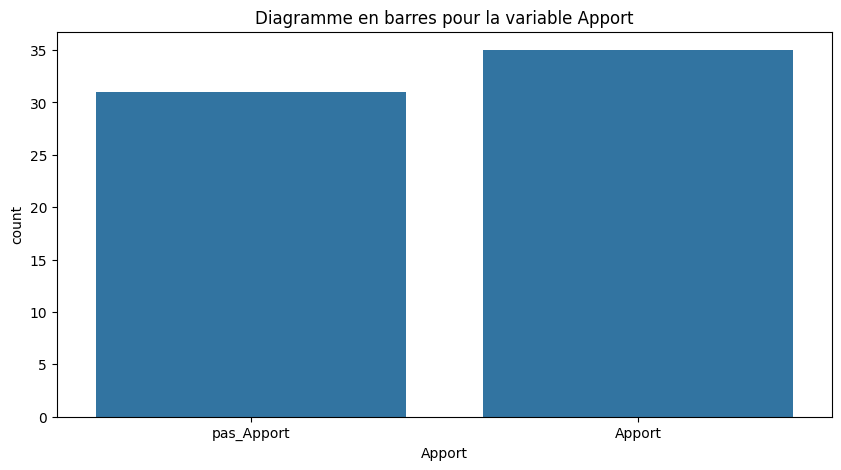

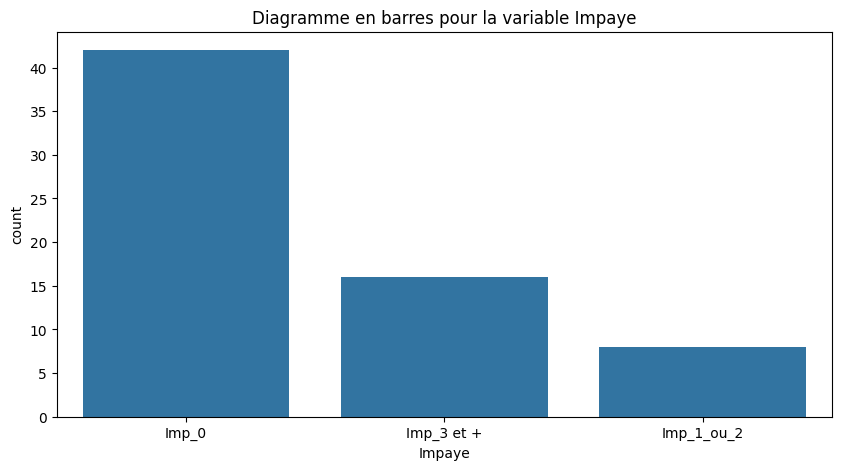

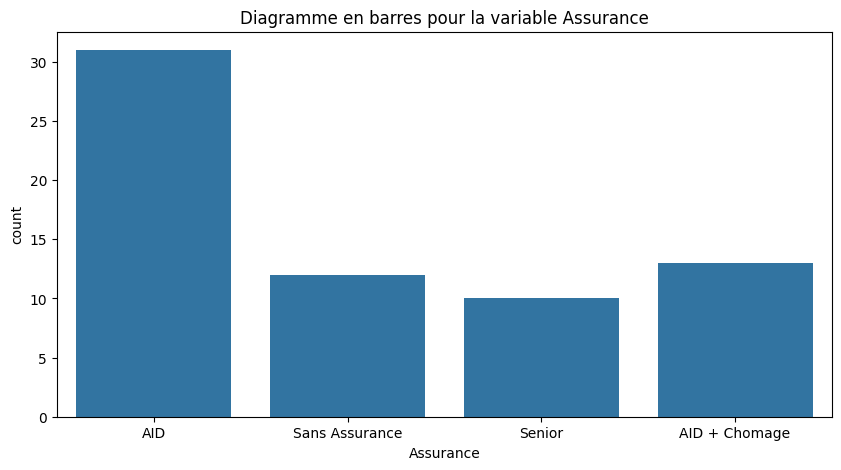

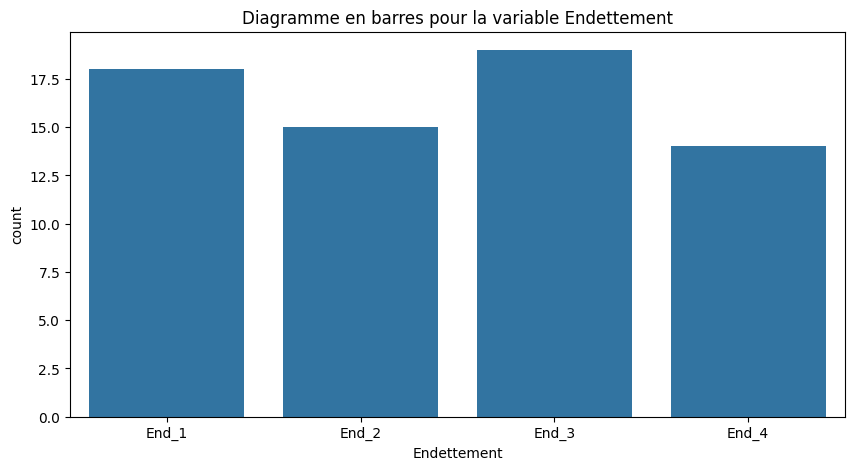

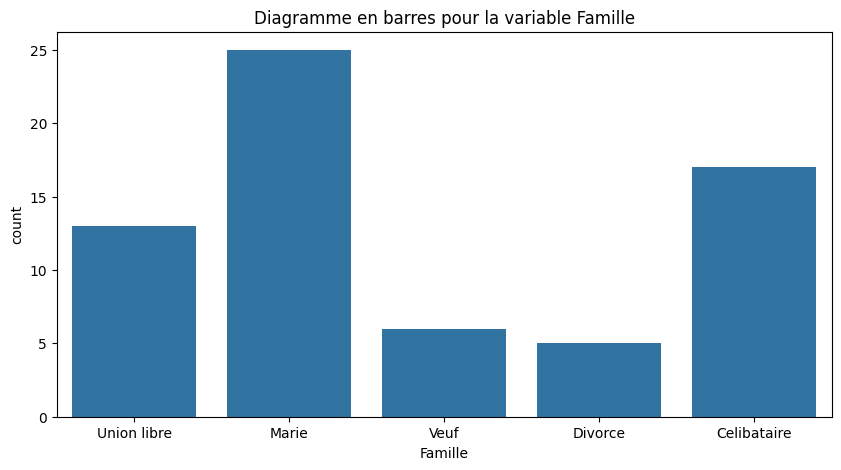

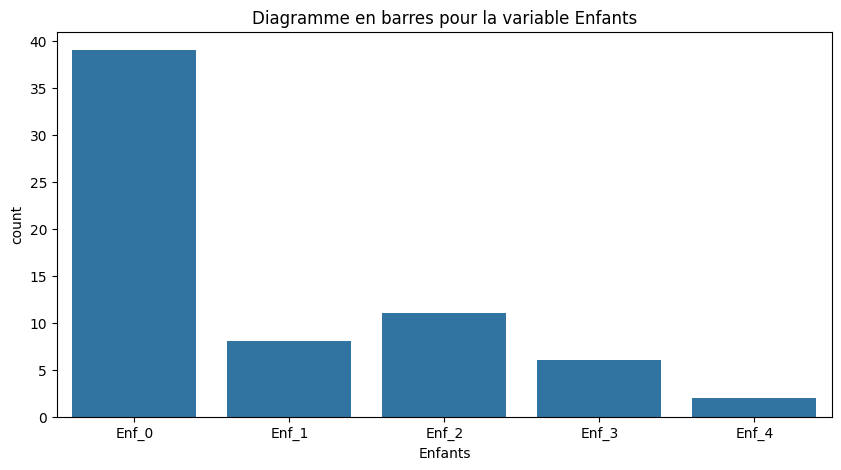

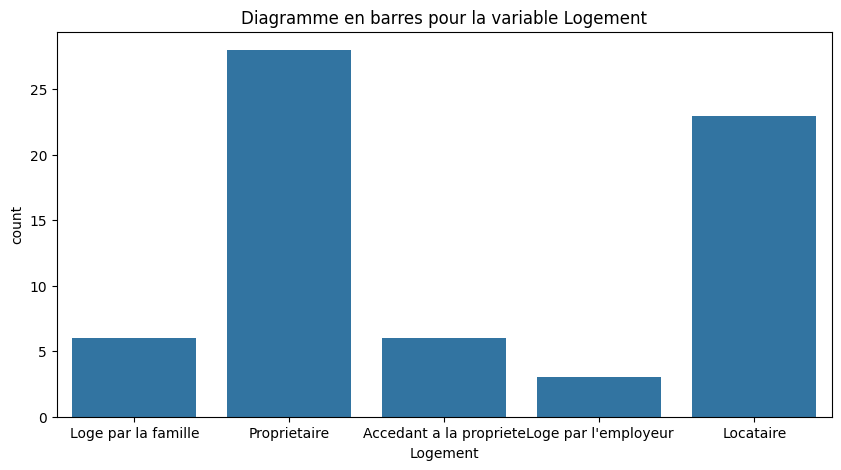

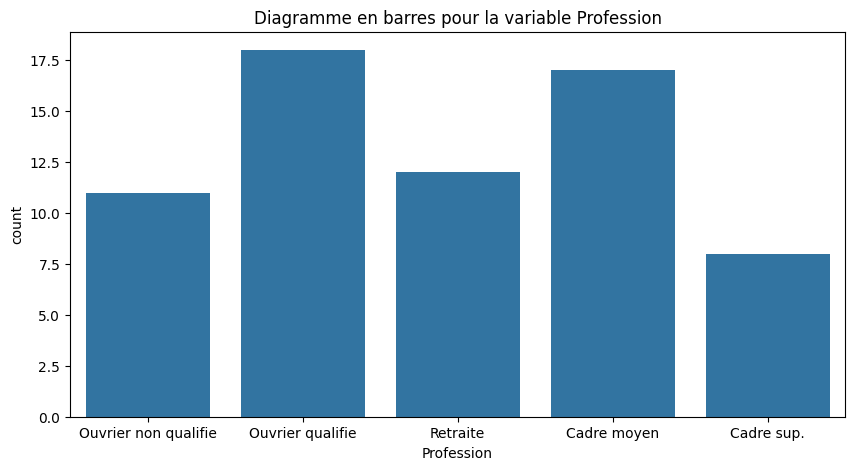

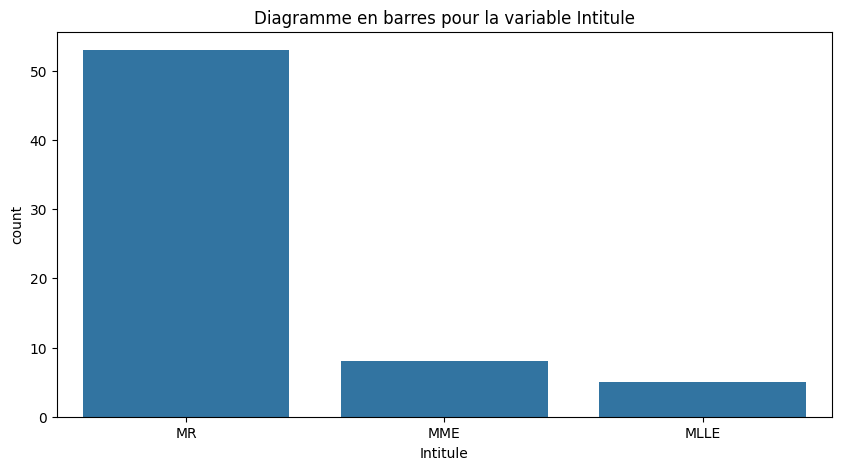

In [79]:
# Créer des graphiques pour les variables catégorielles
for columns in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=columns, data=credit)
    plt.title(f"Diagramme en barres pour la variable {columns}")
    plt.show()

Les diagrammes de Camembert

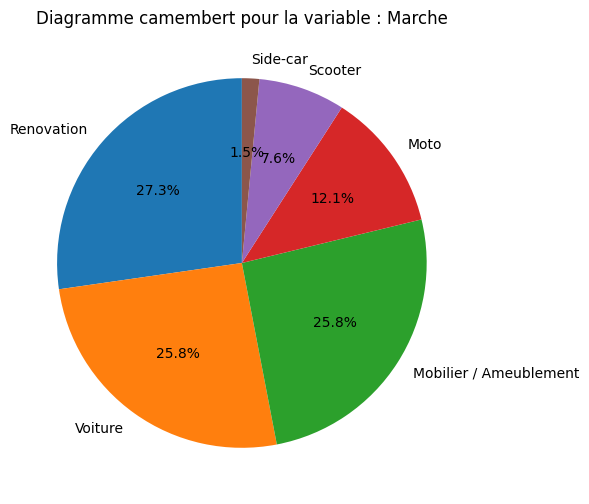

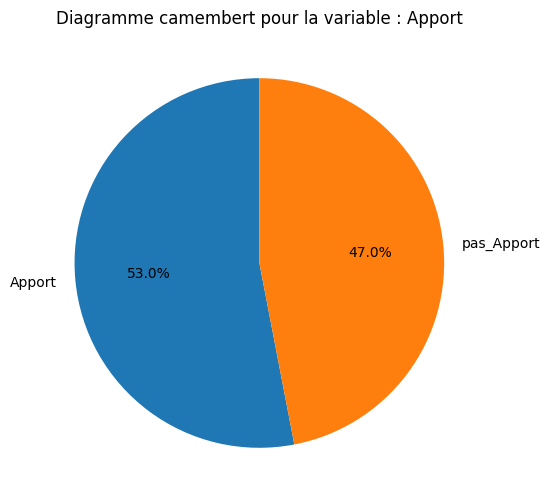

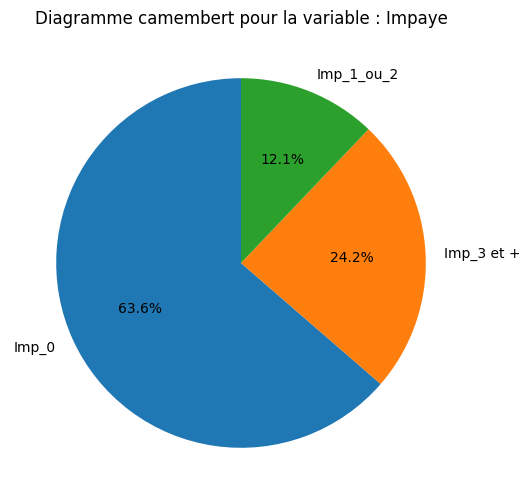

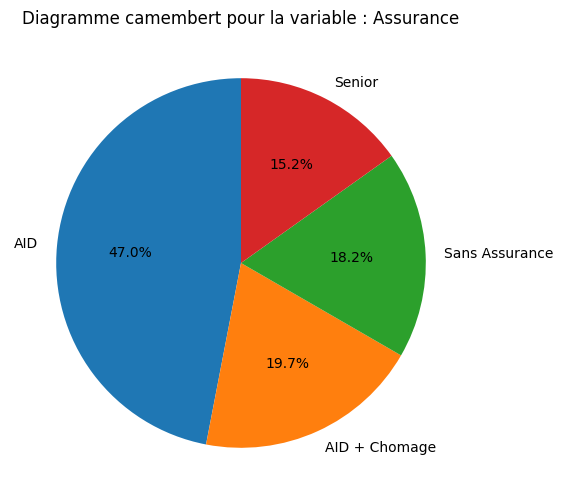

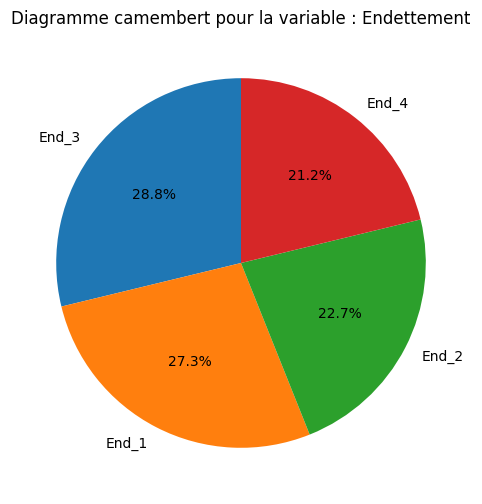

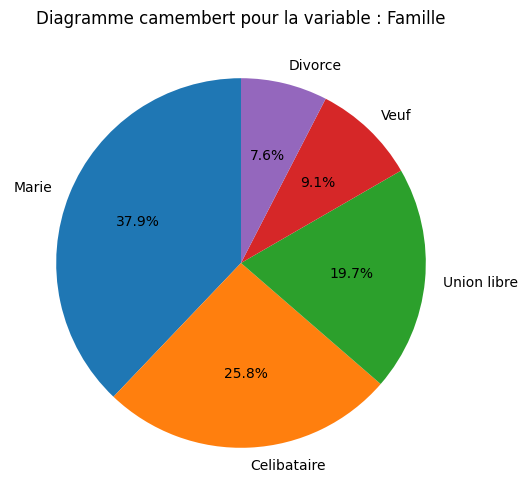

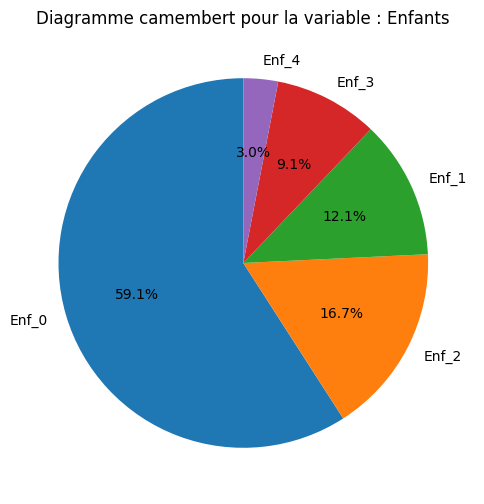

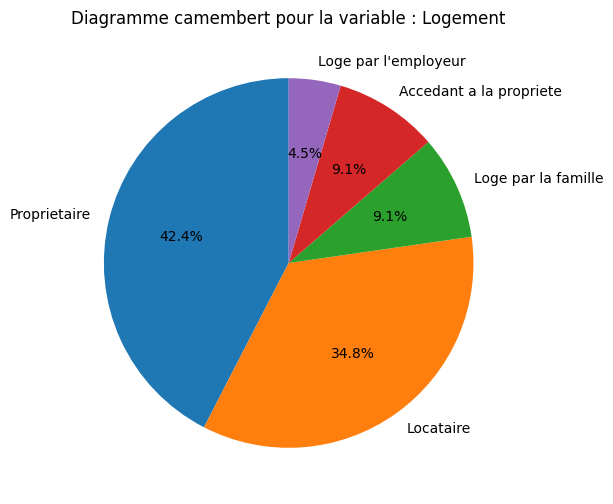

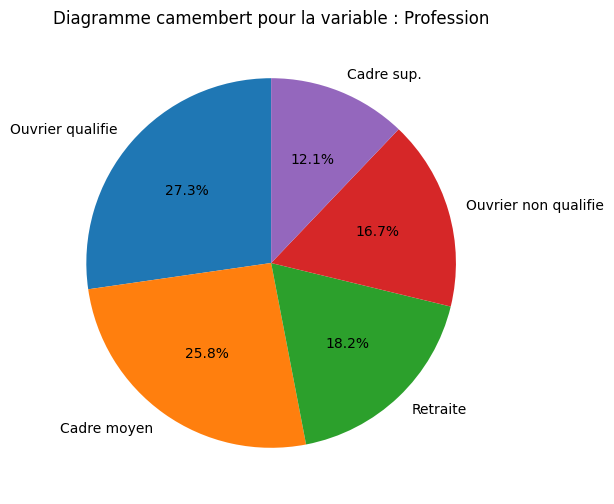

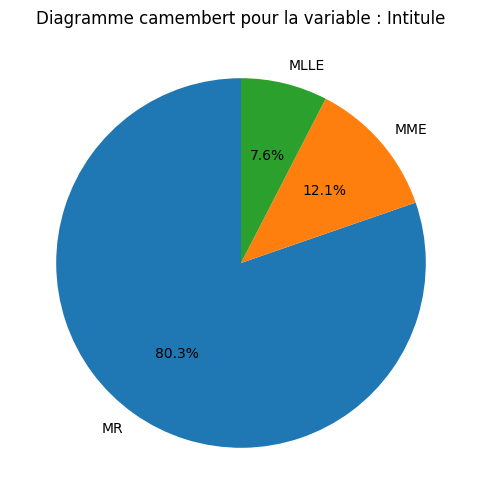

In [94]:
# Créer des graphiques camemberts pour les variables catégorielles
for columns in categorical_columns:
    plt.figure(figsize=(10, 6))
    credit[columns].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Diagramme camembert pour la variable : {columns}")
    plt.ylabel('')
    plt.show()

            ANALYSE BAVARIÉ

                Analyse des variables deux à deux

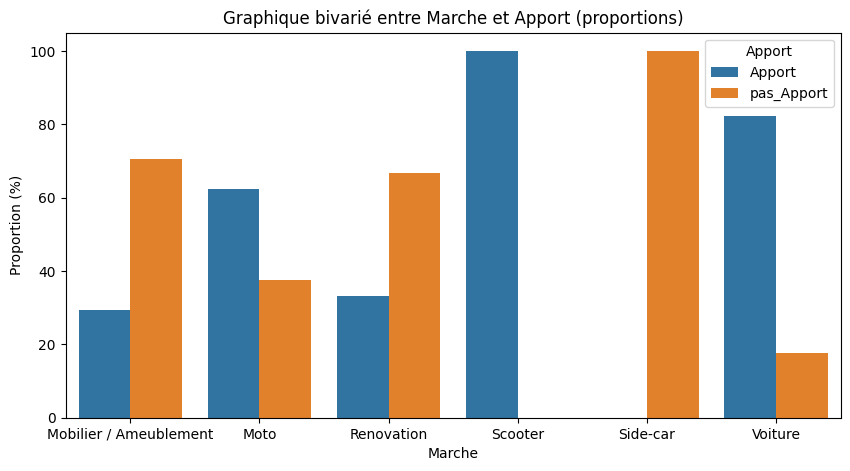

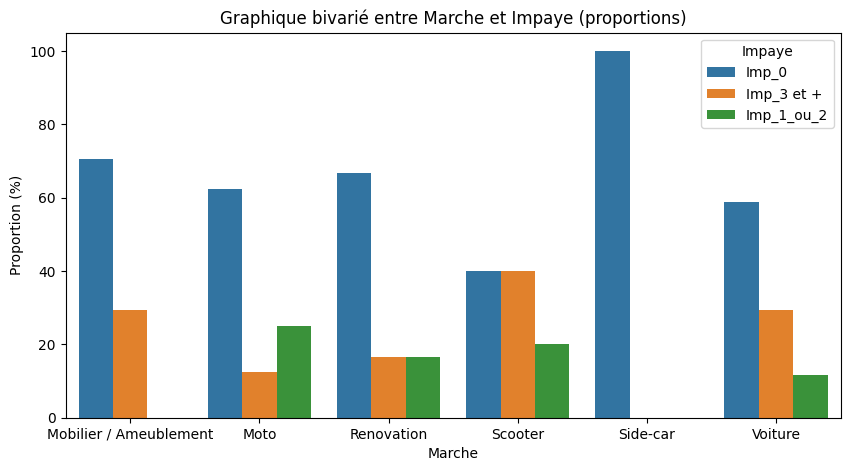

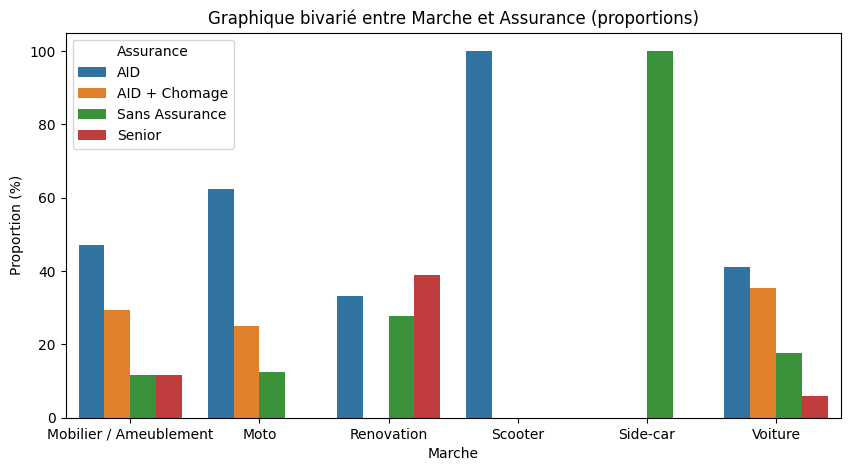

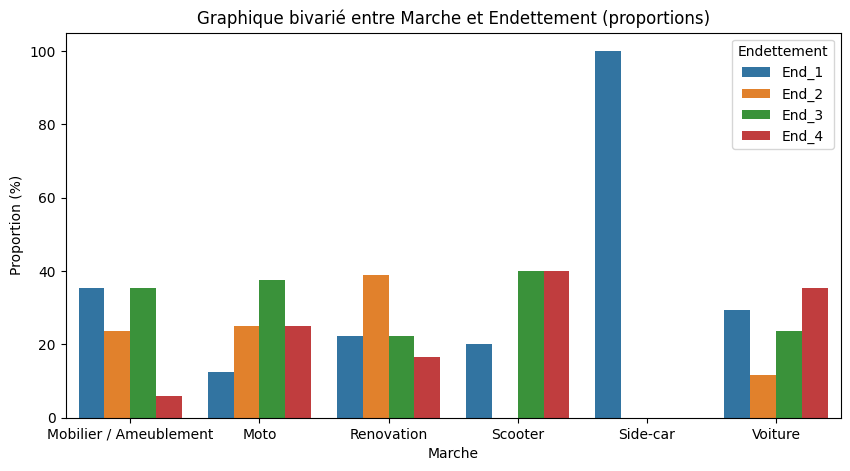

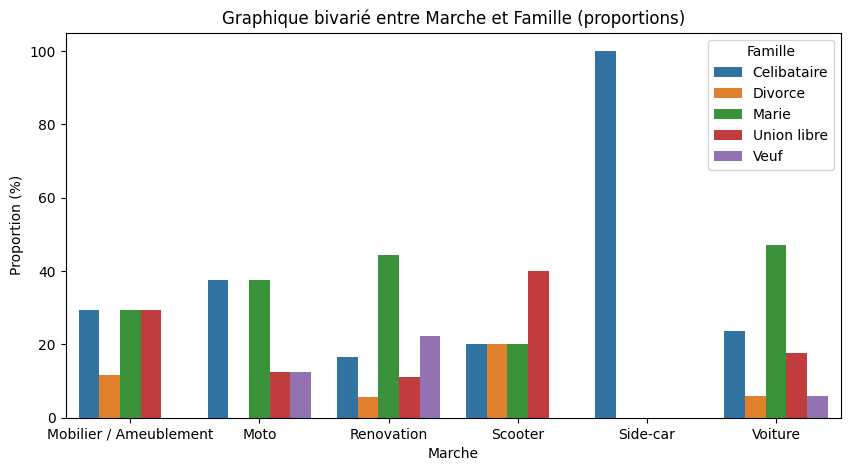

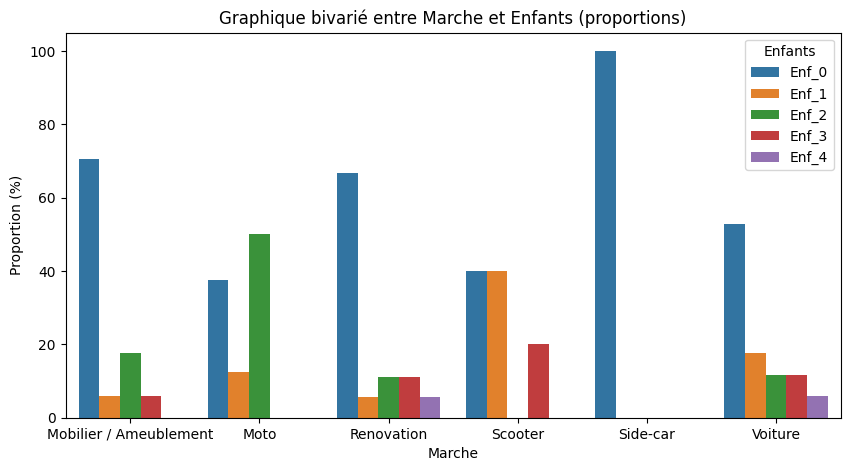

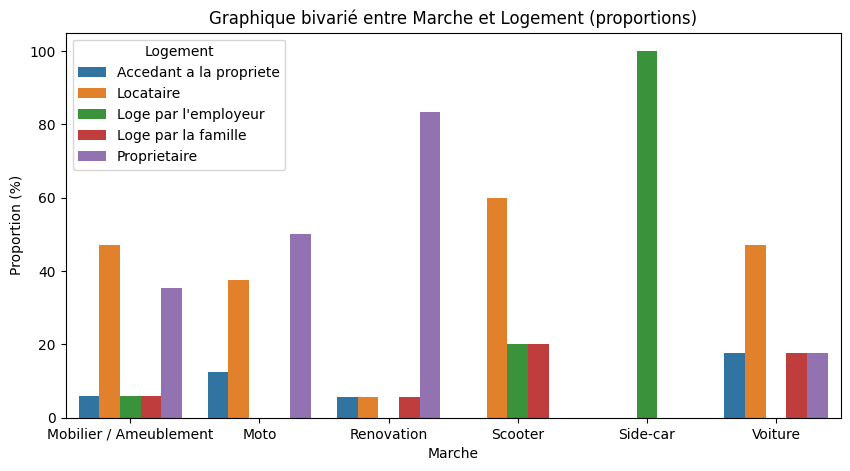

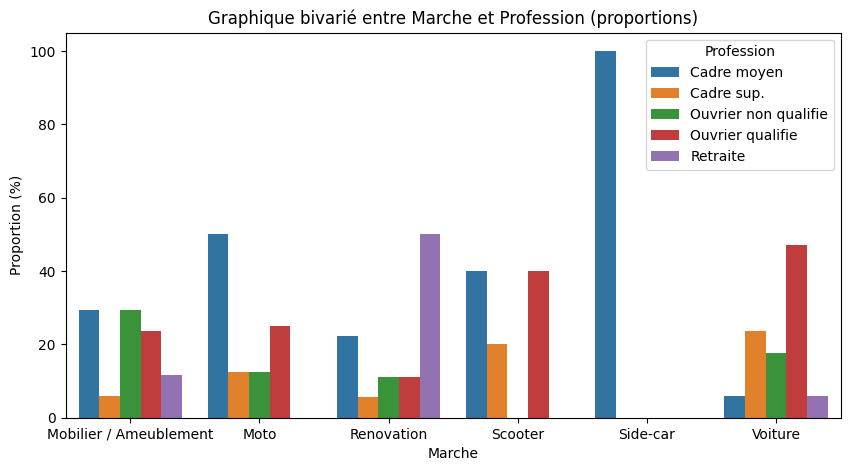

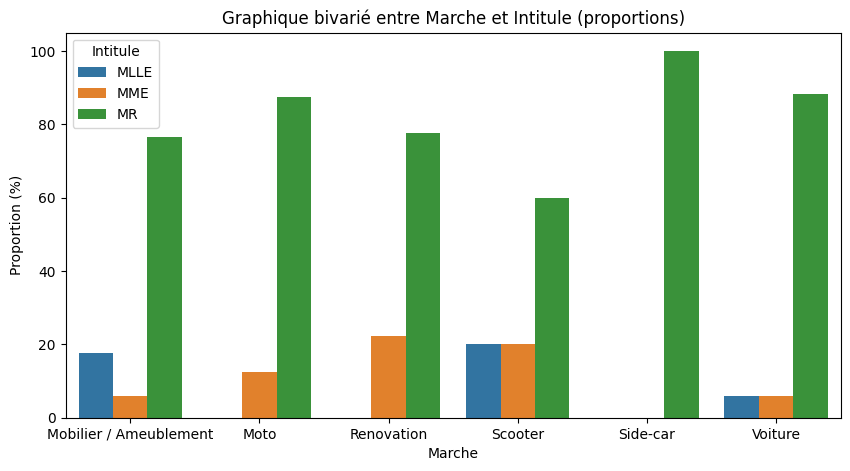

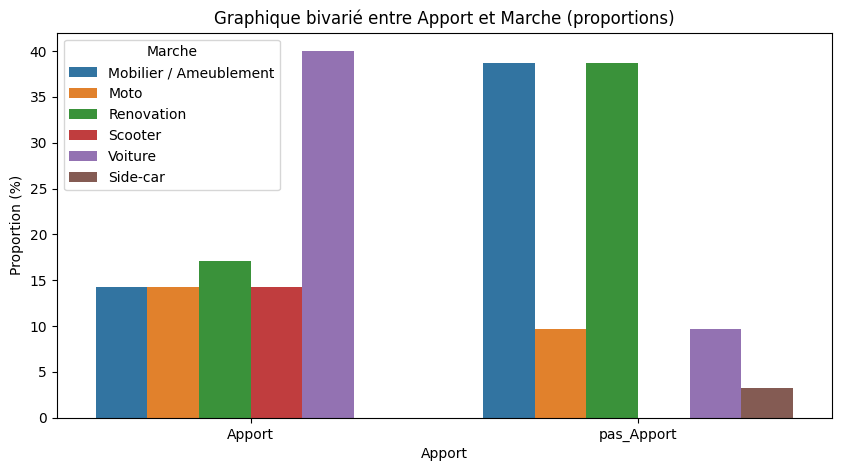

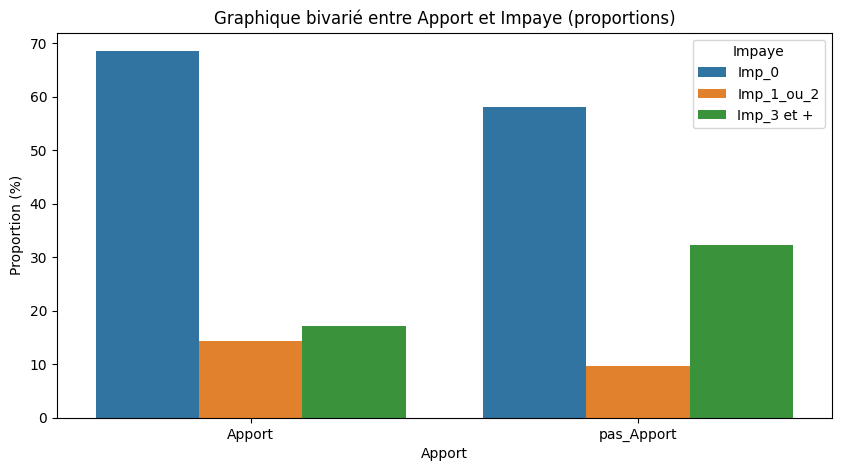

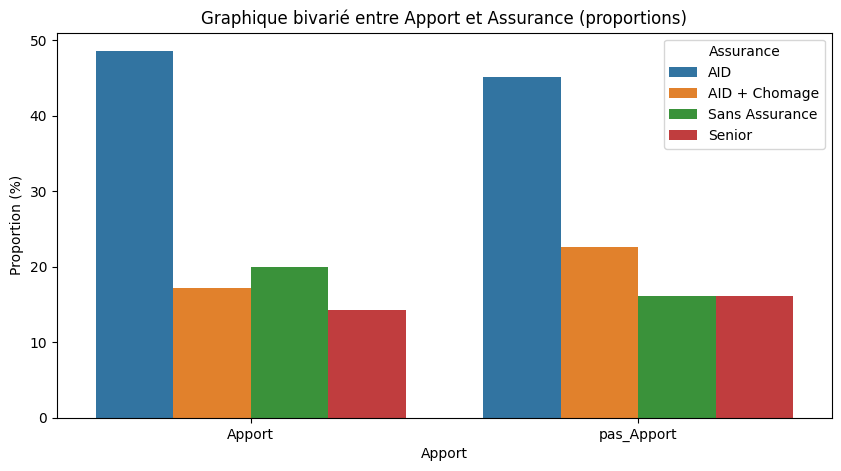

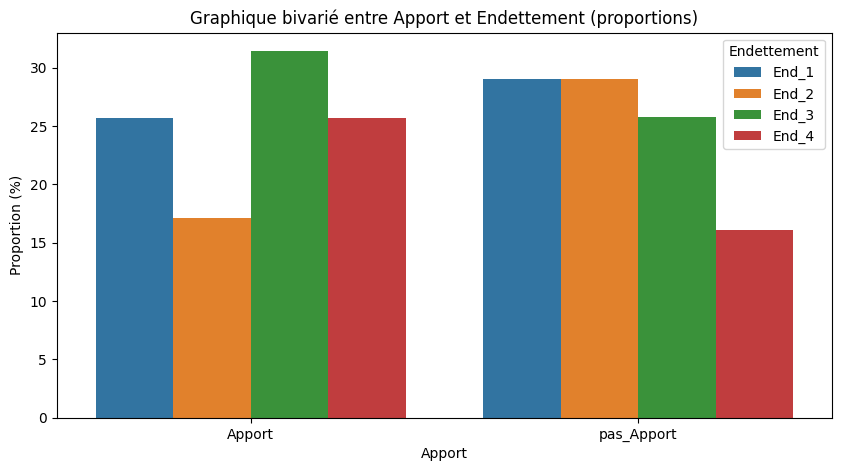

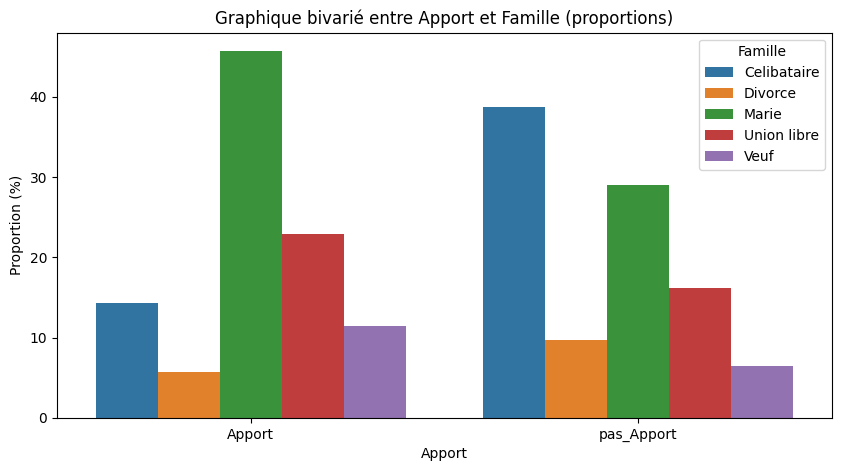

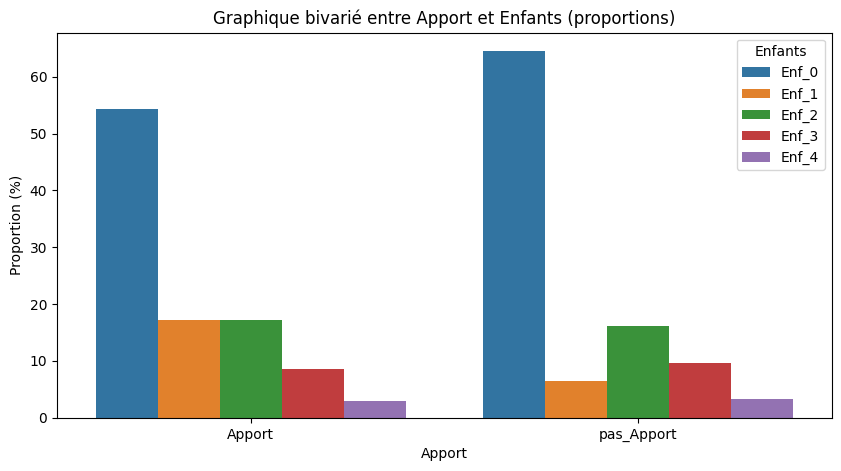

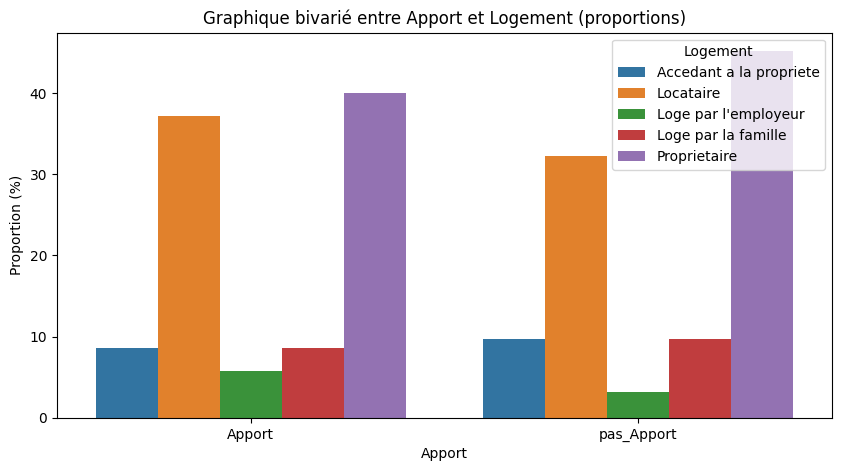

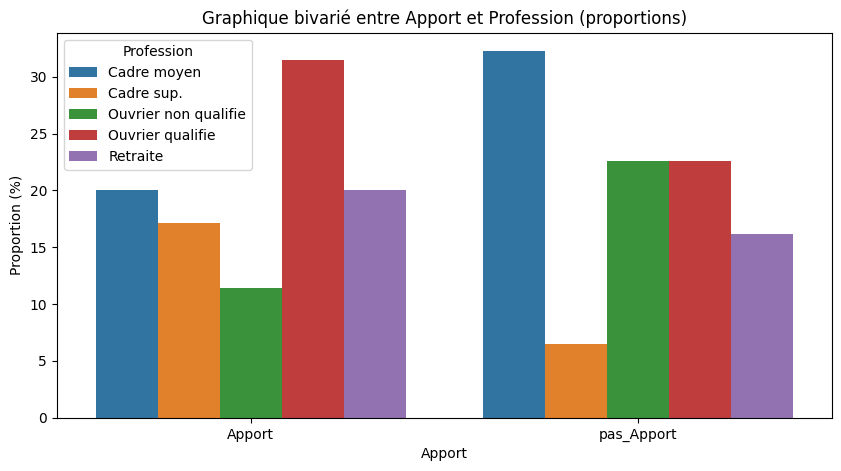

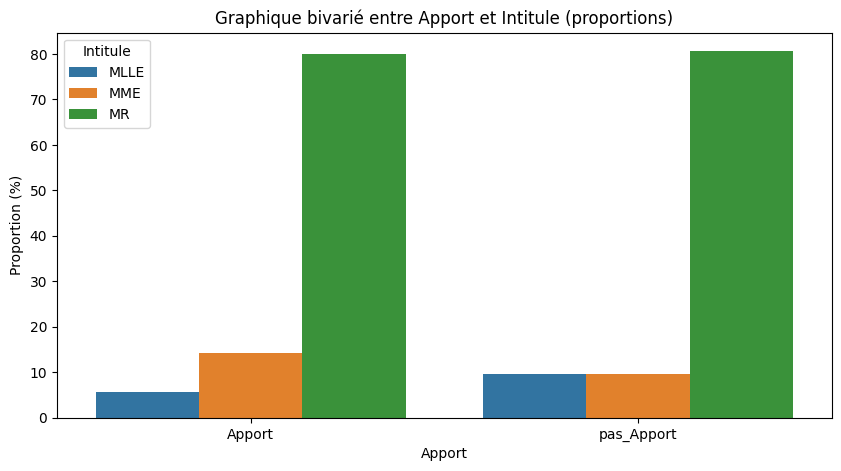

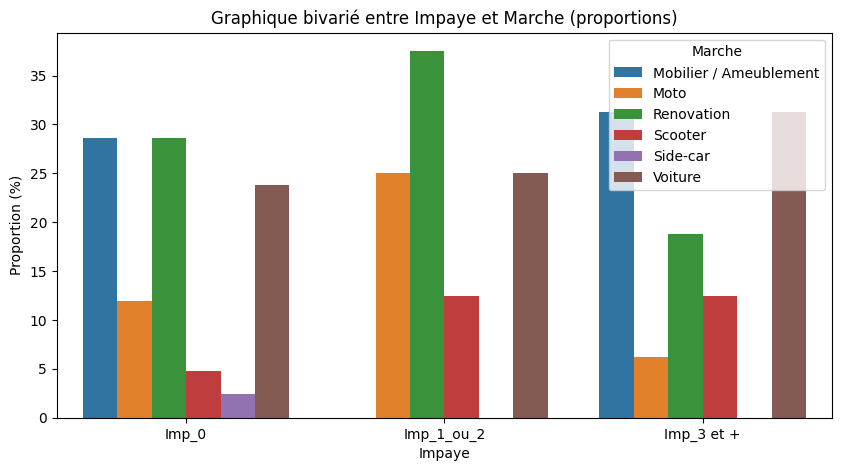

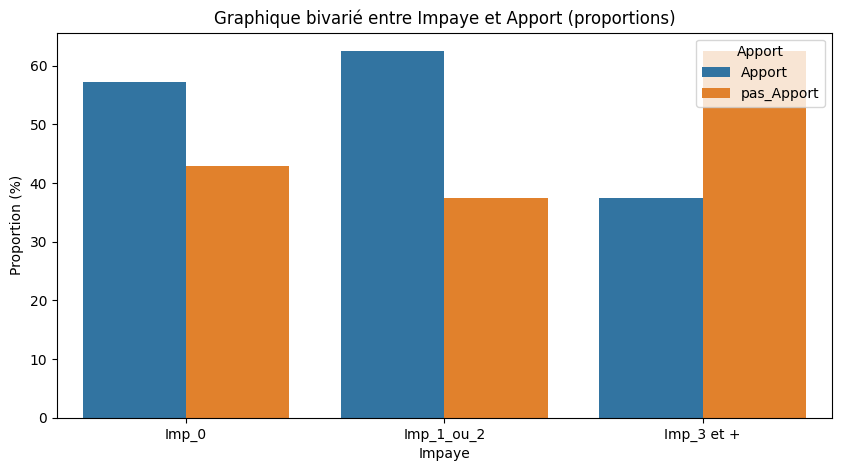

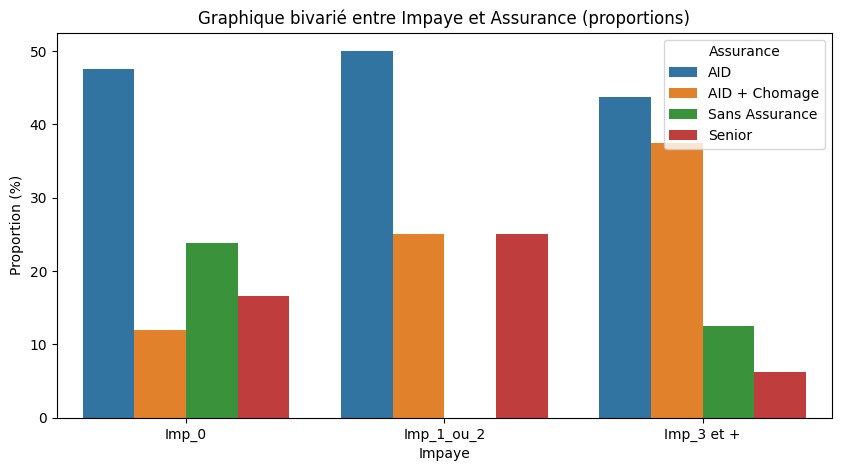

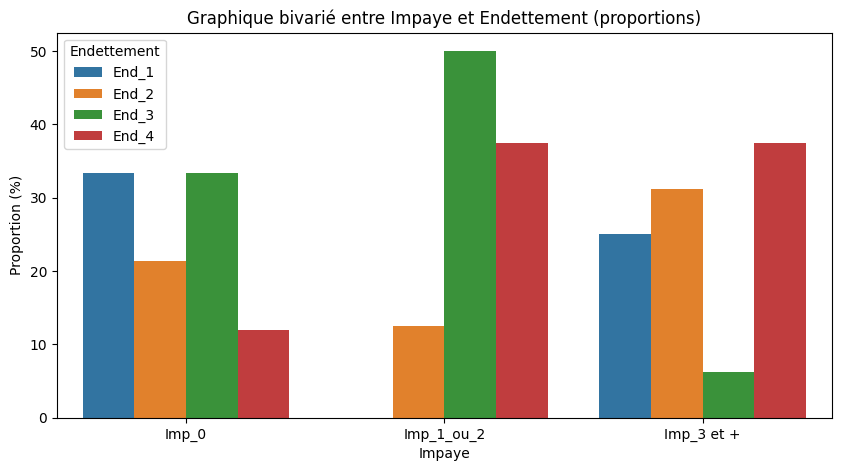

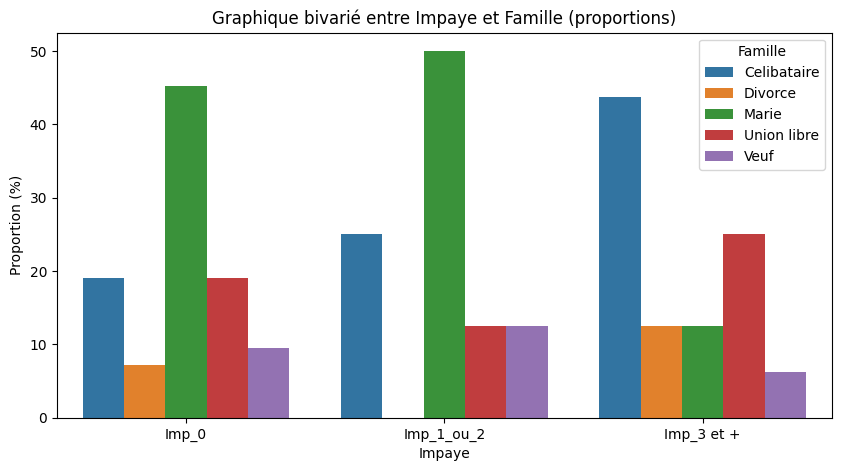

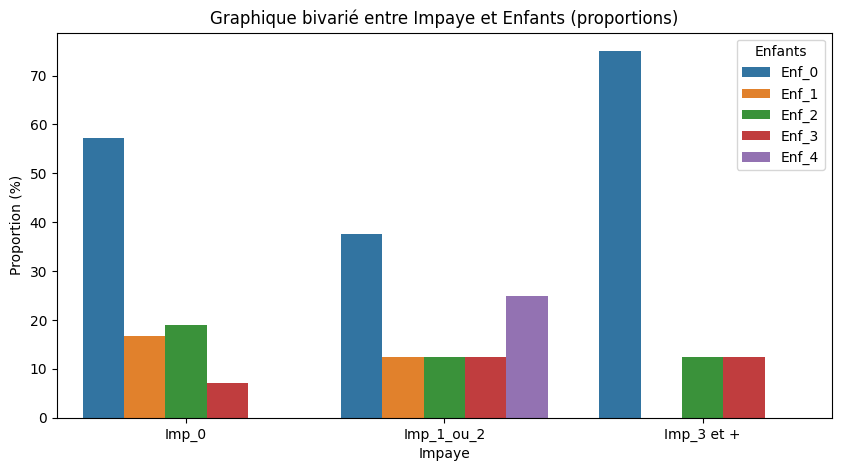

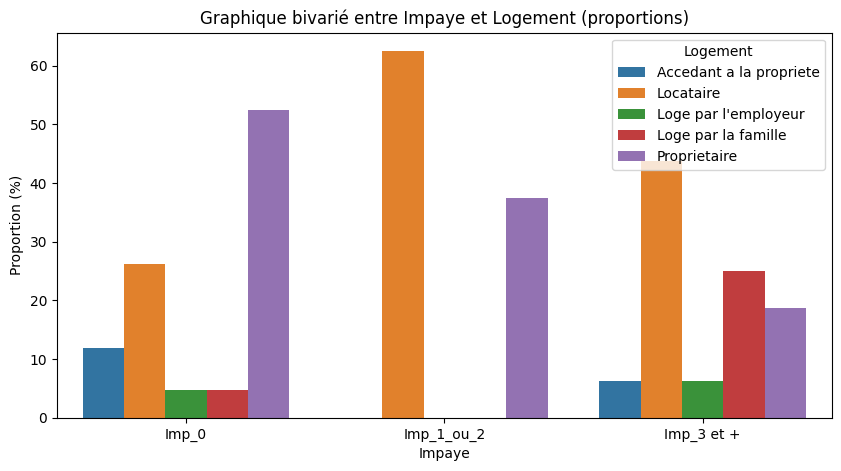

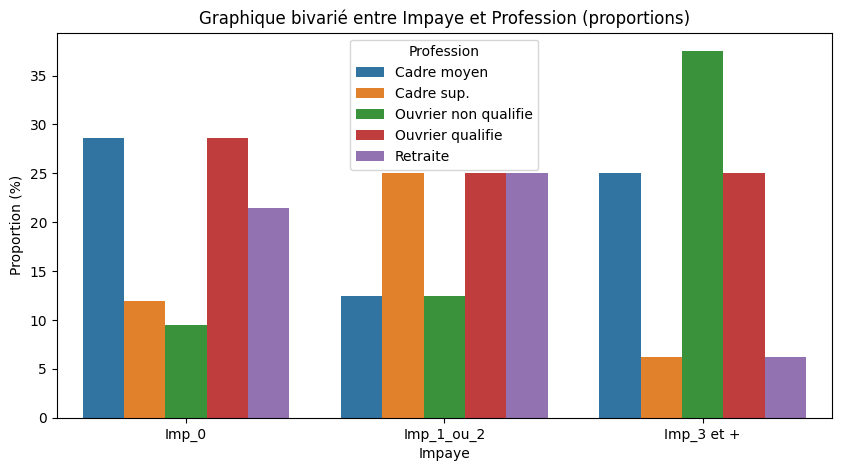

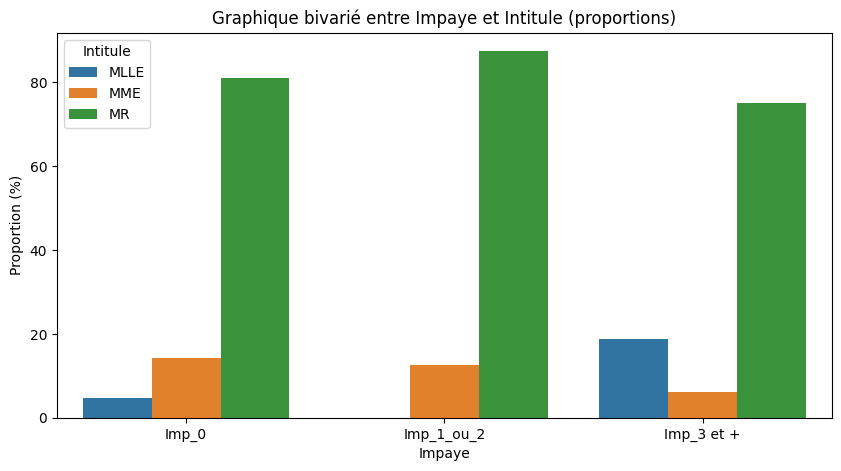

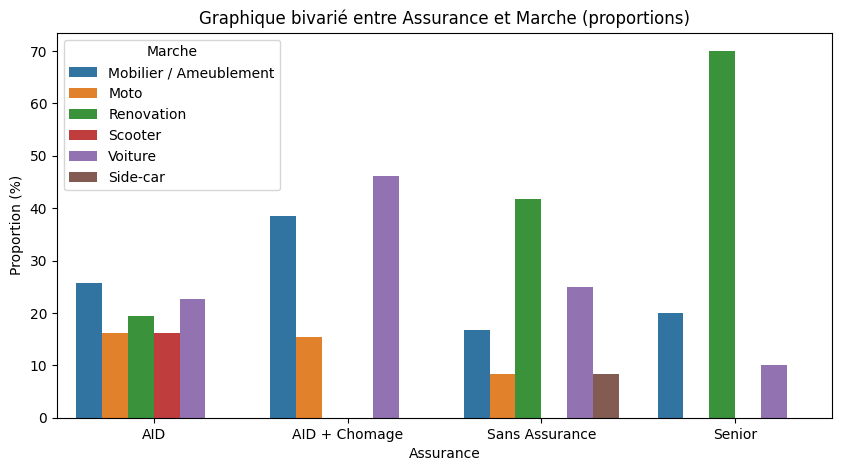

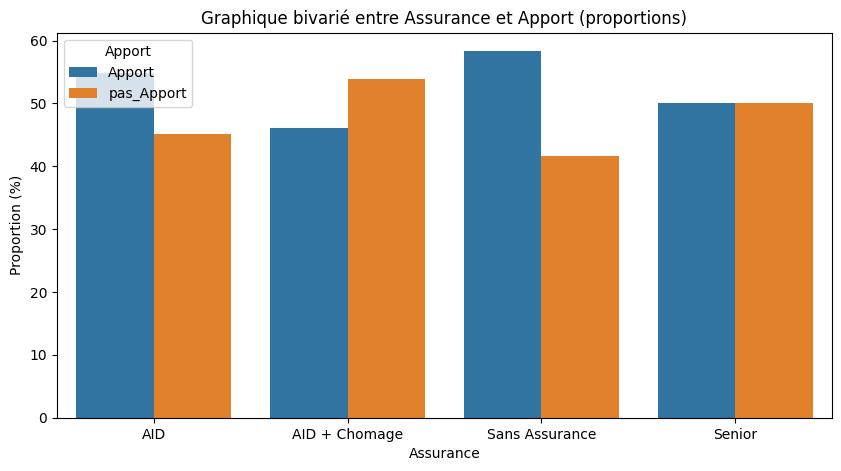

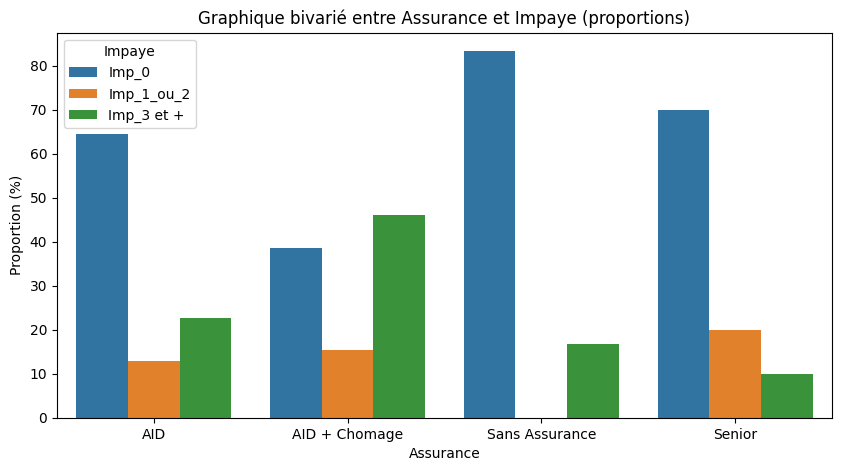

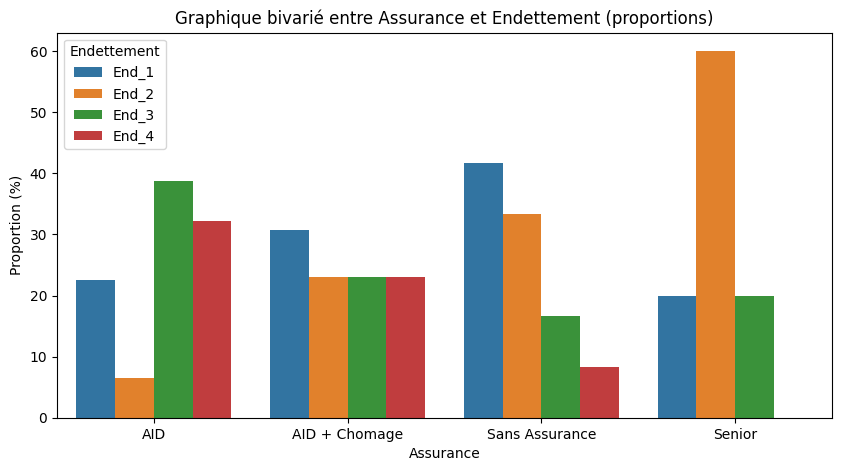

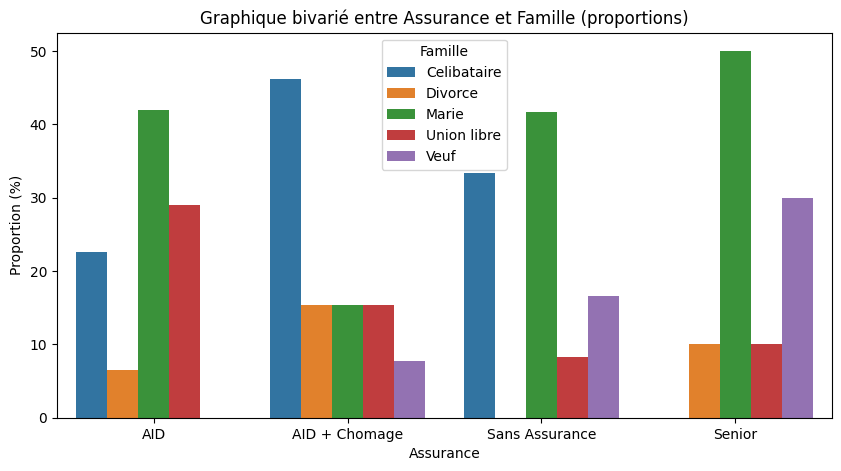

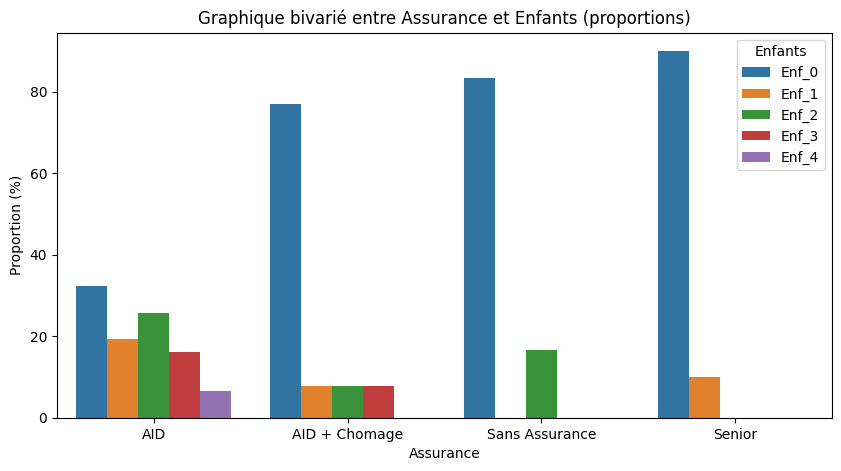

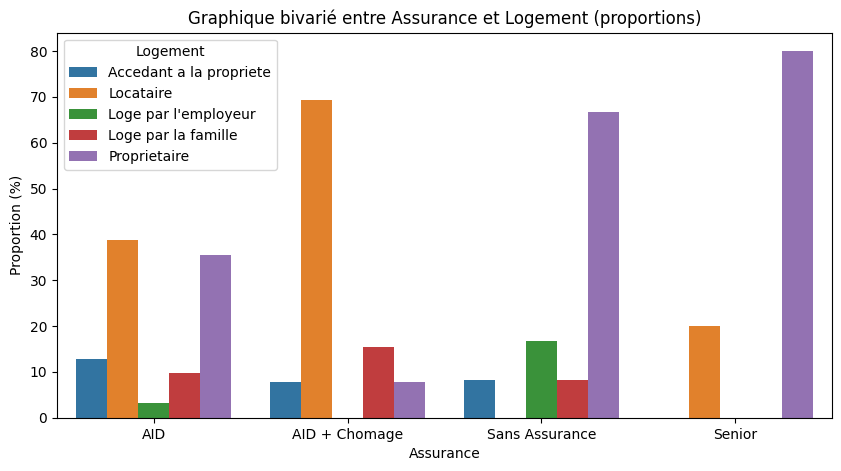

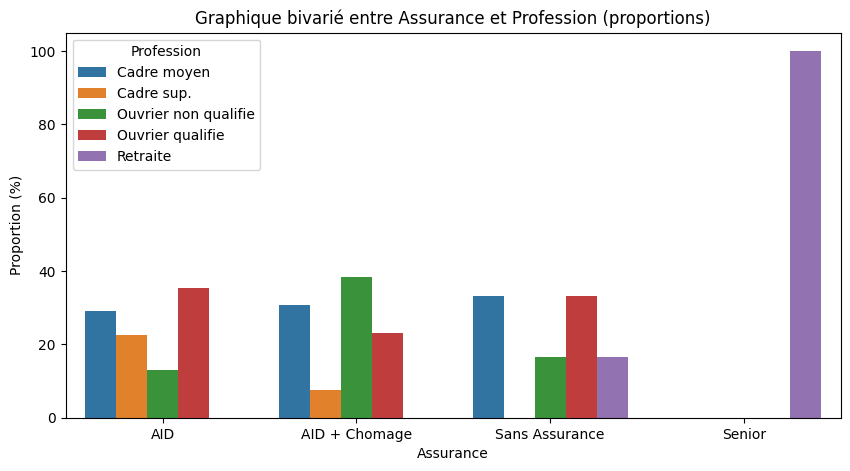

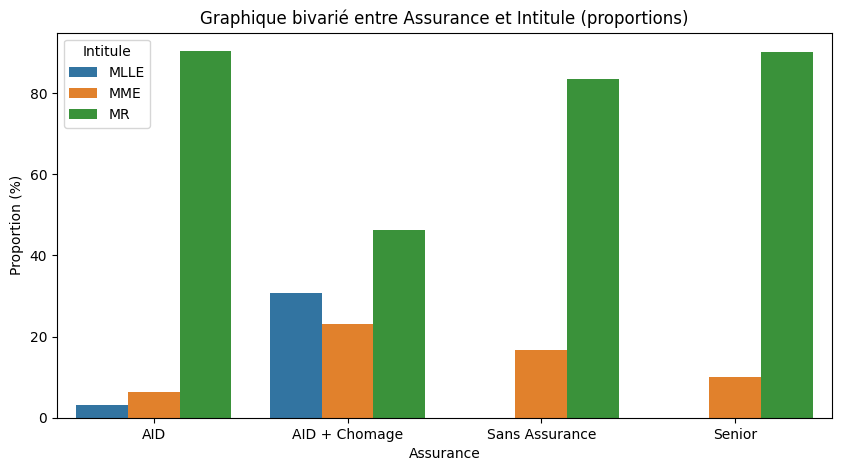

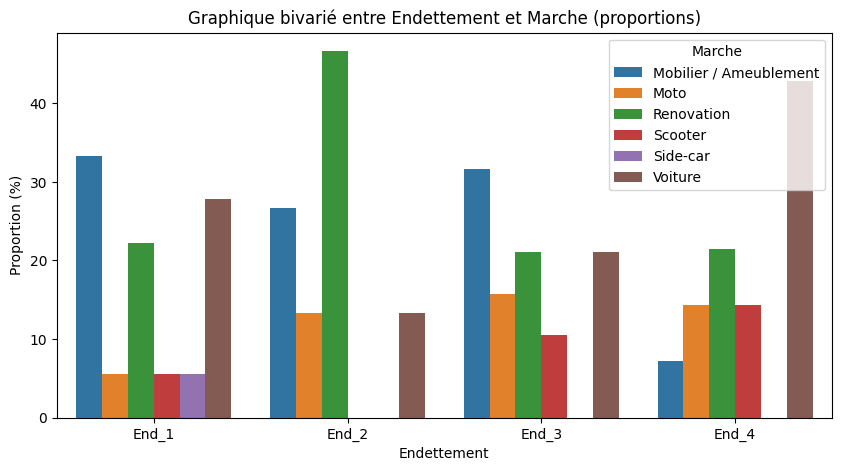

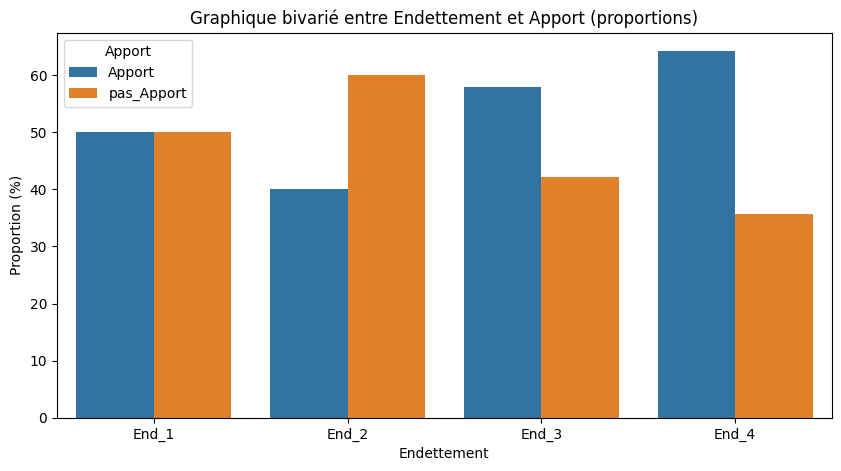

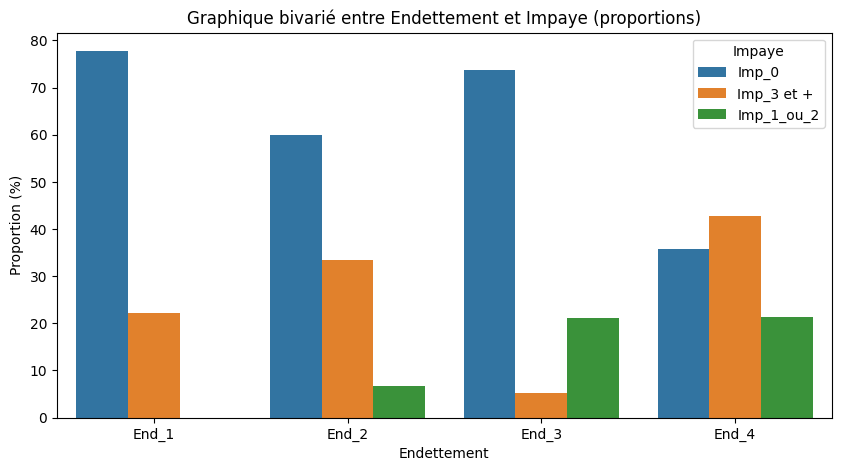

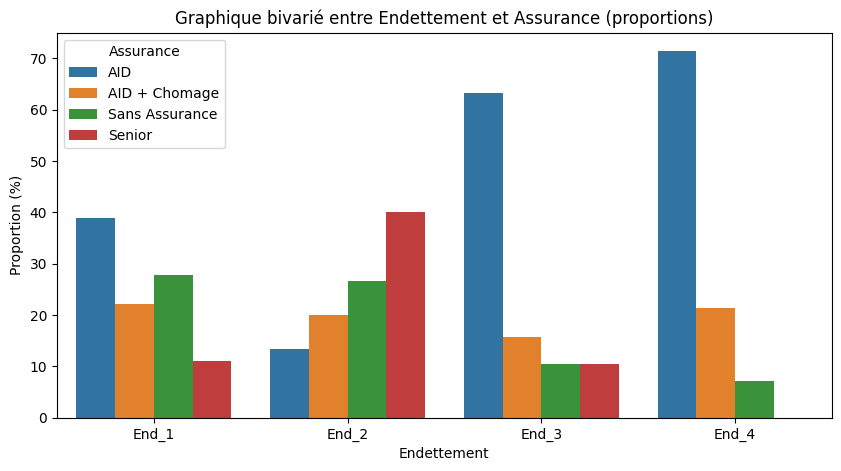

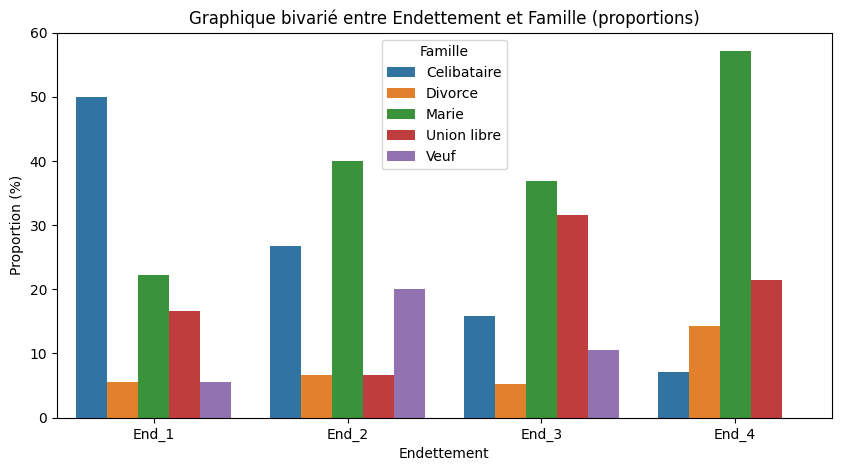

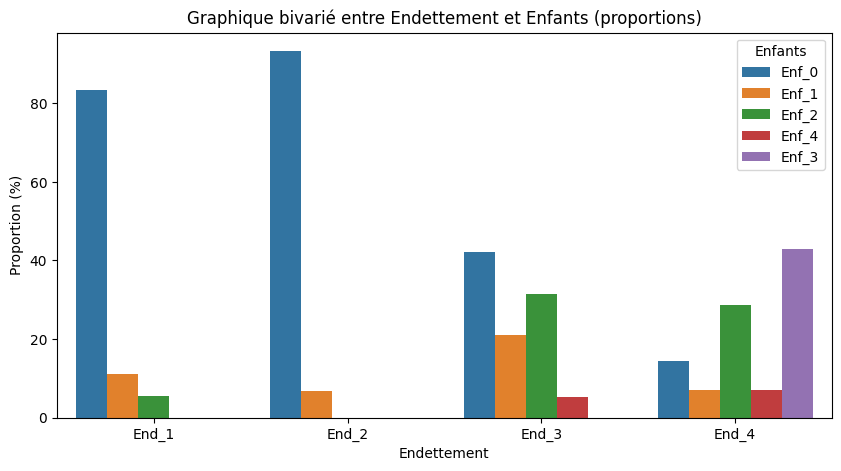

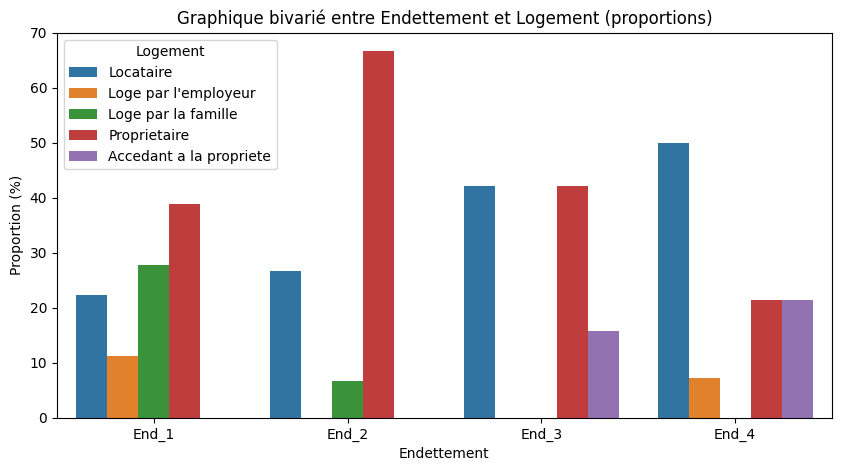

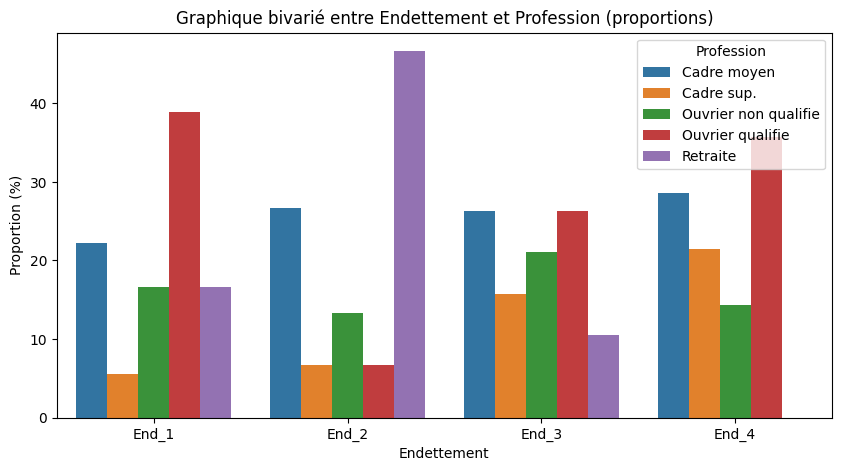

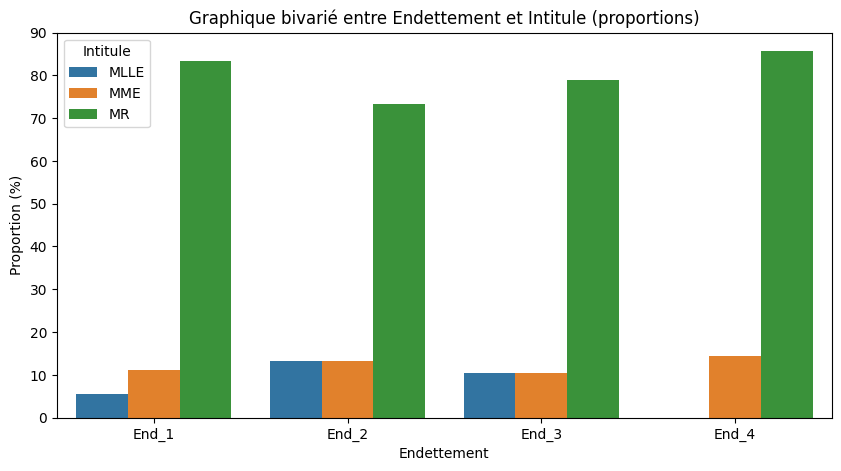

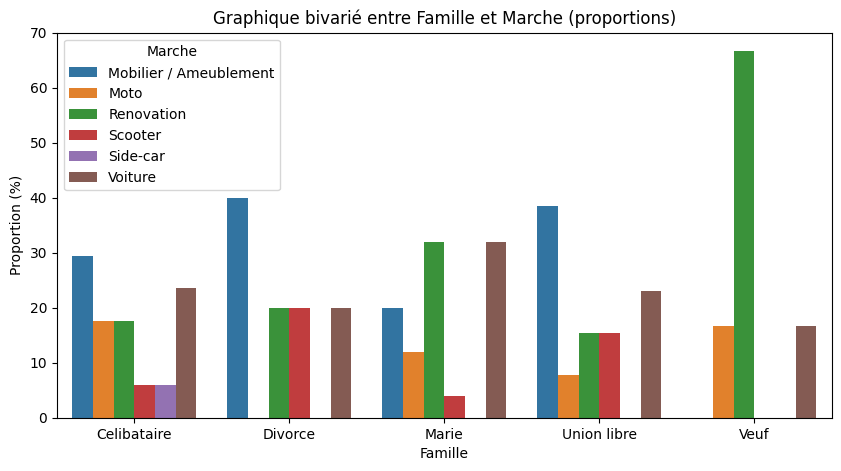

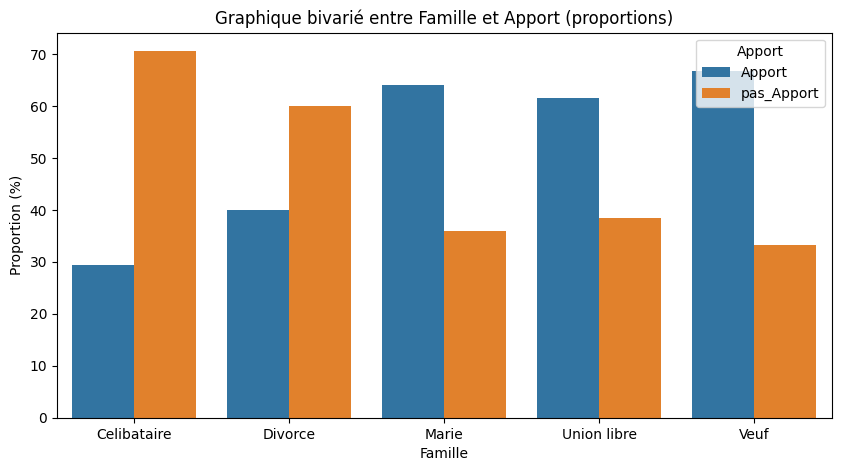

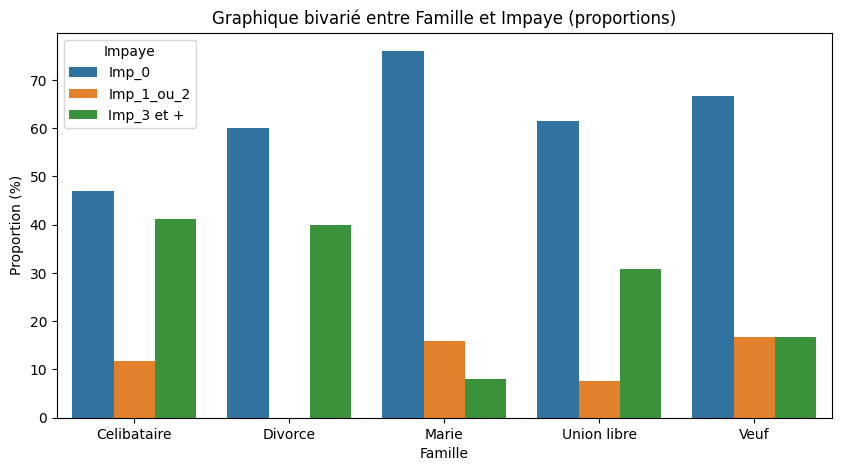

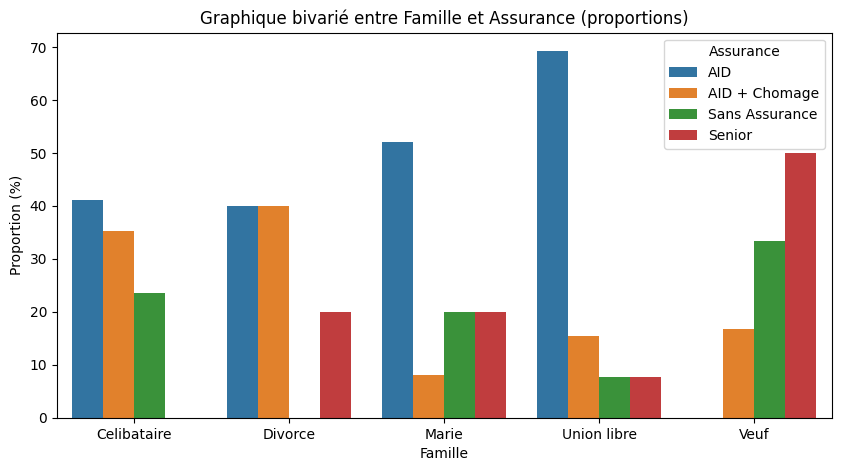

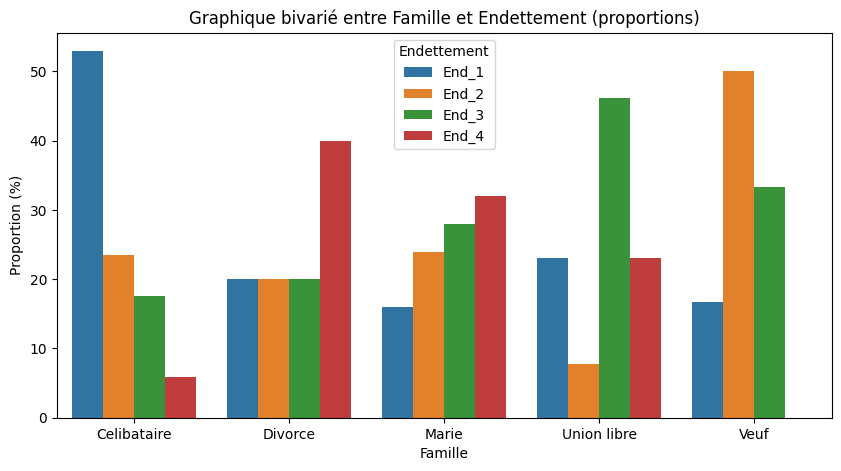

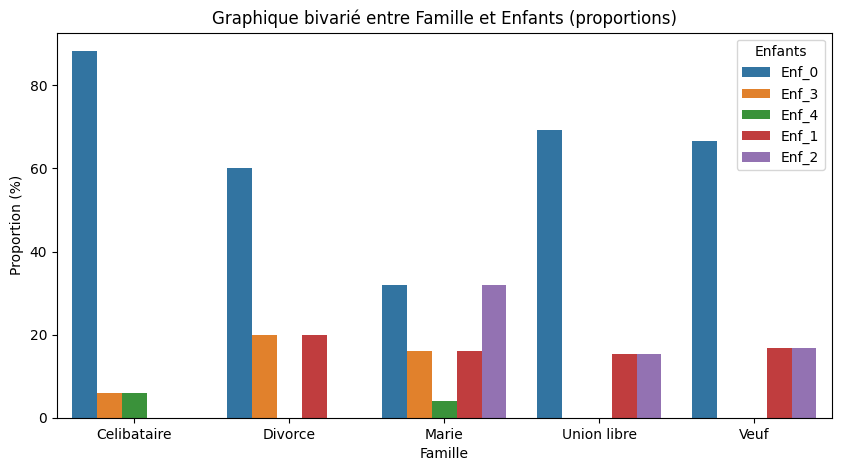

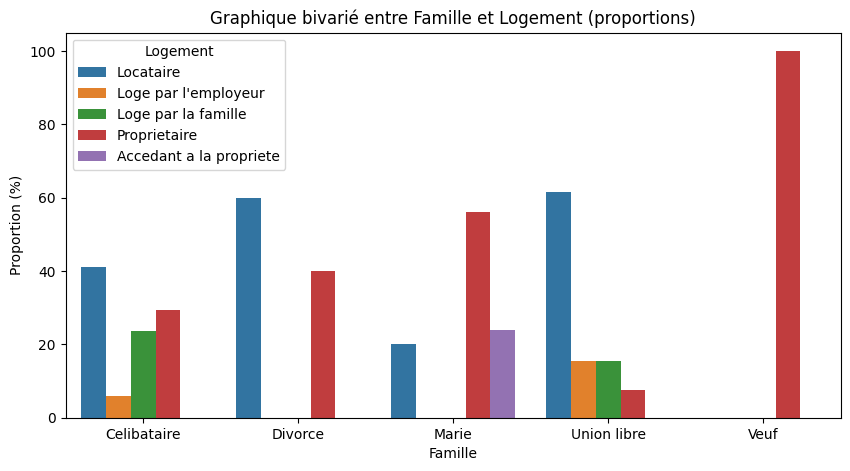

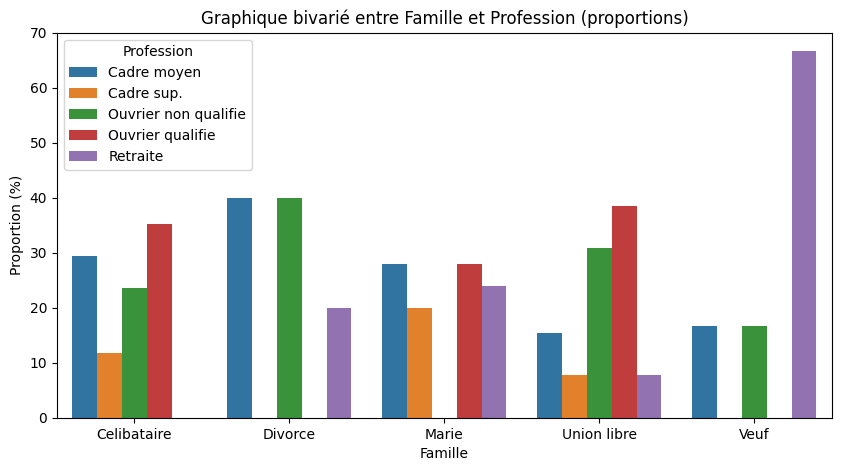

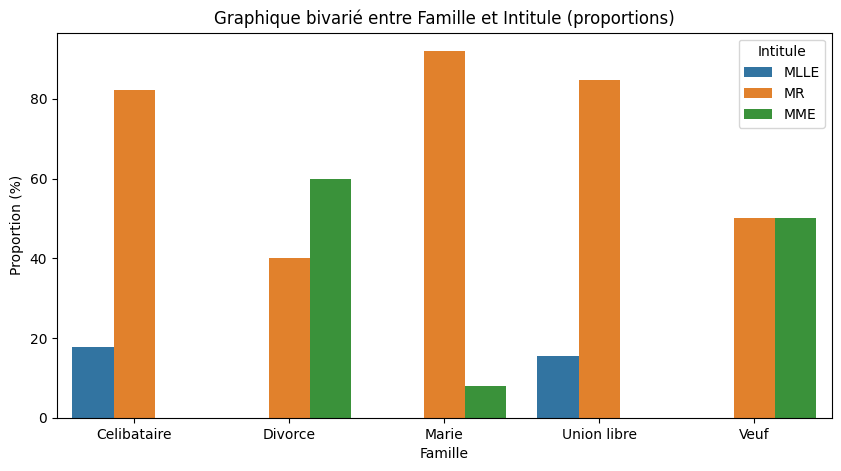

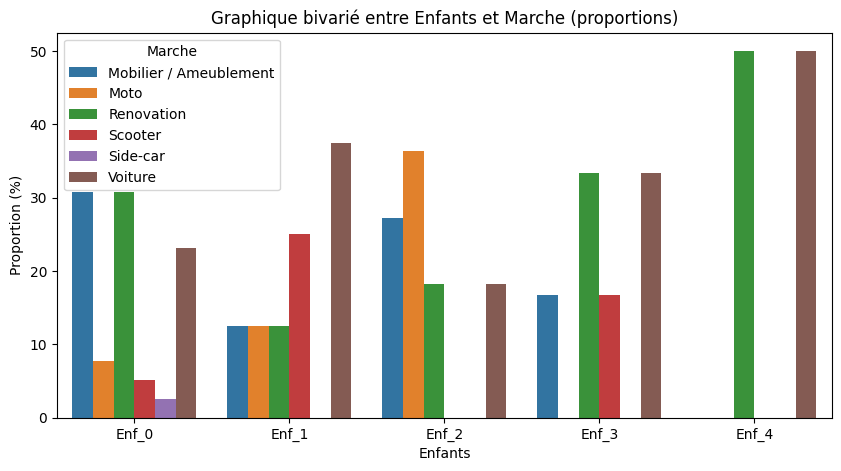

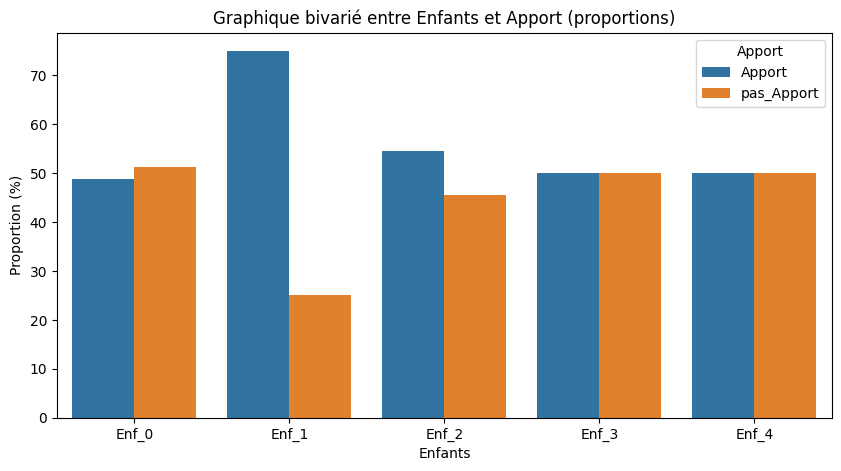

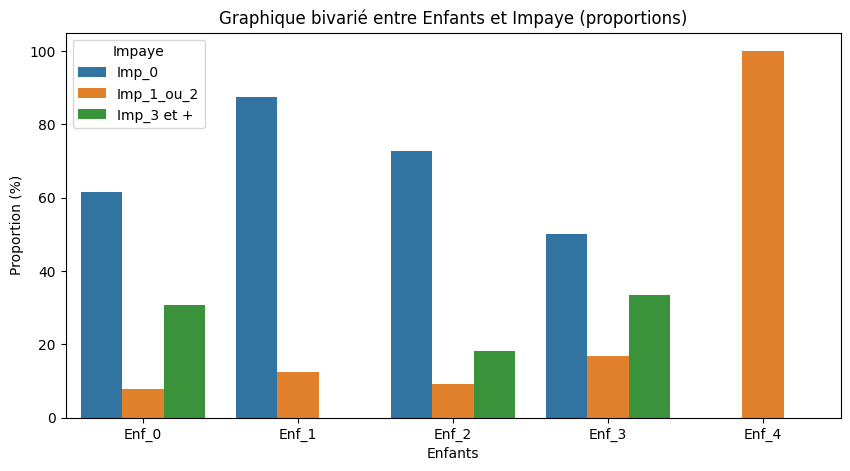

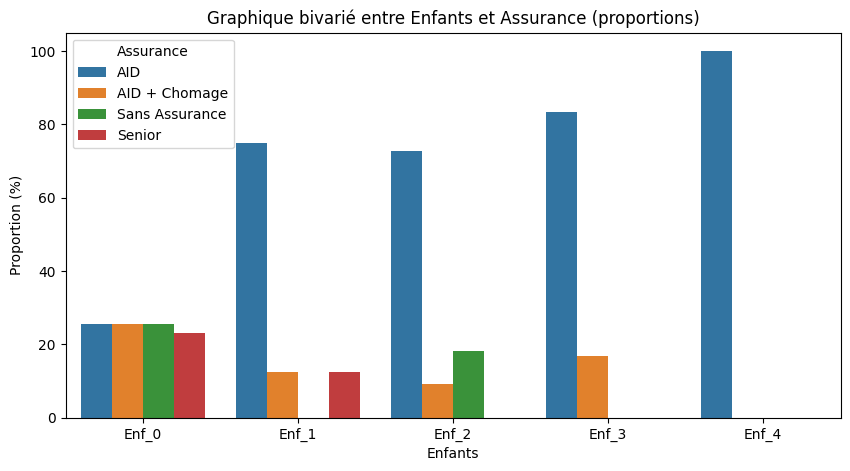

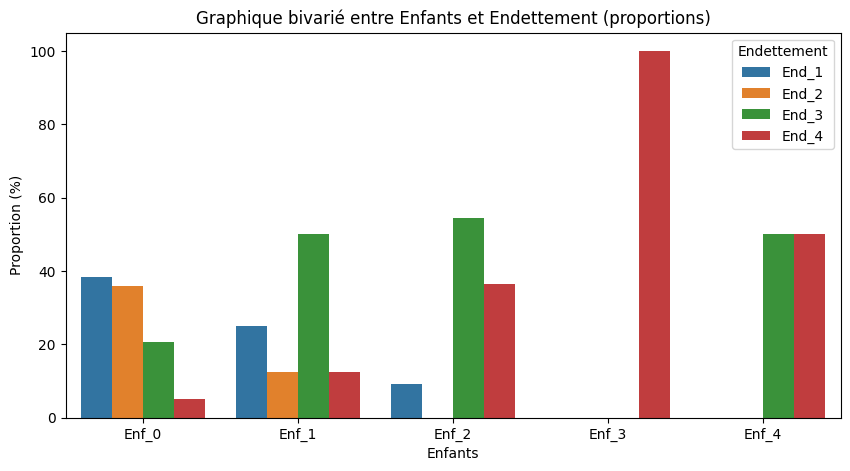

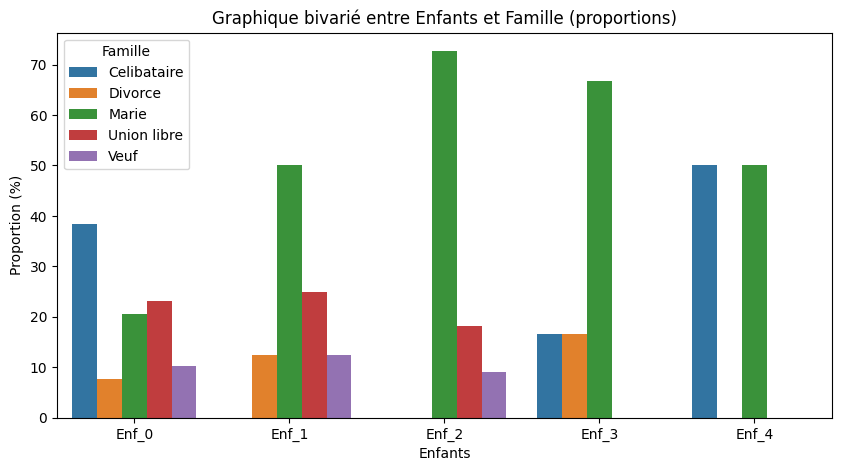

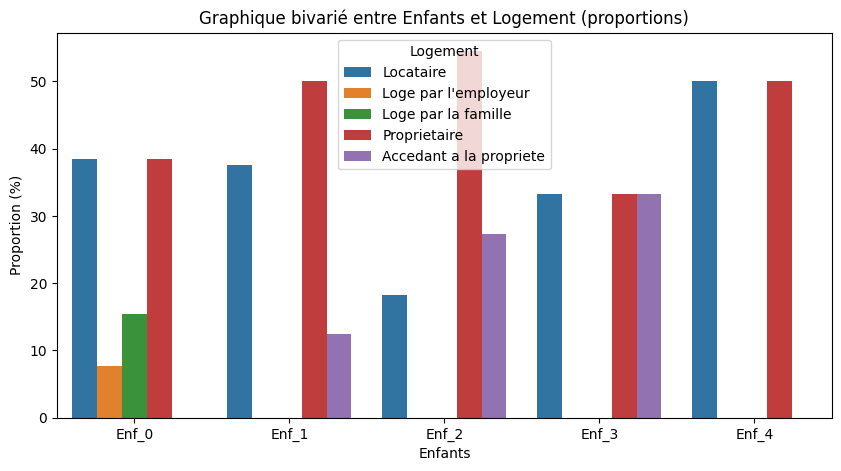

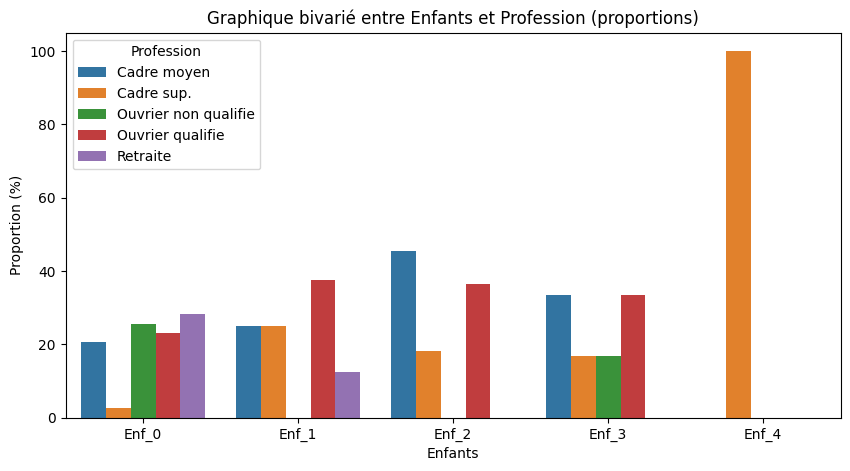

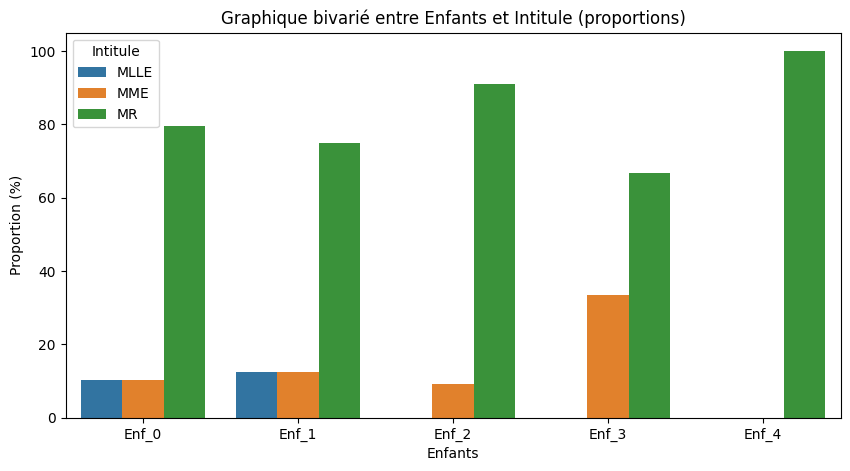

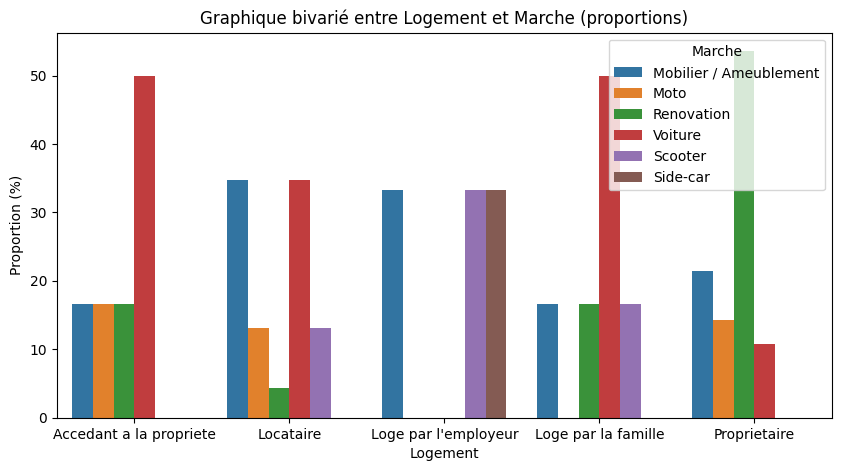

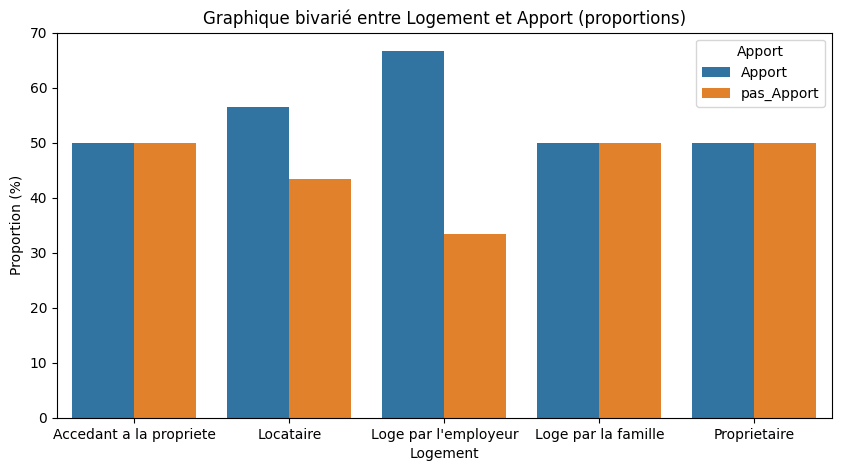

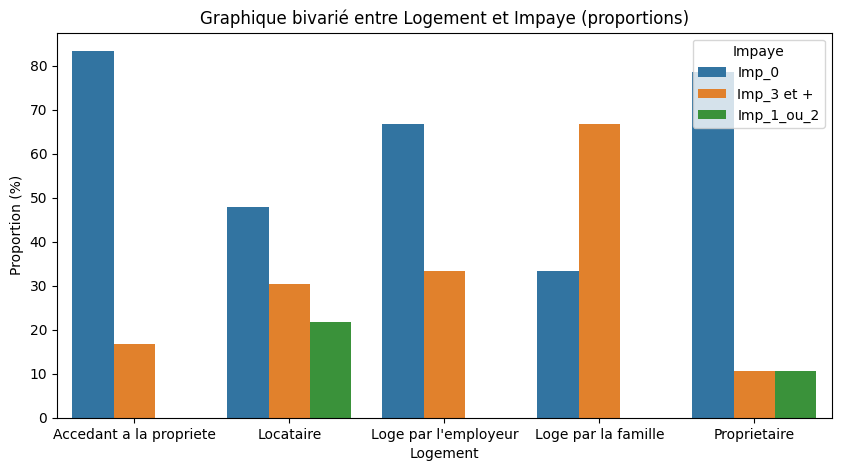

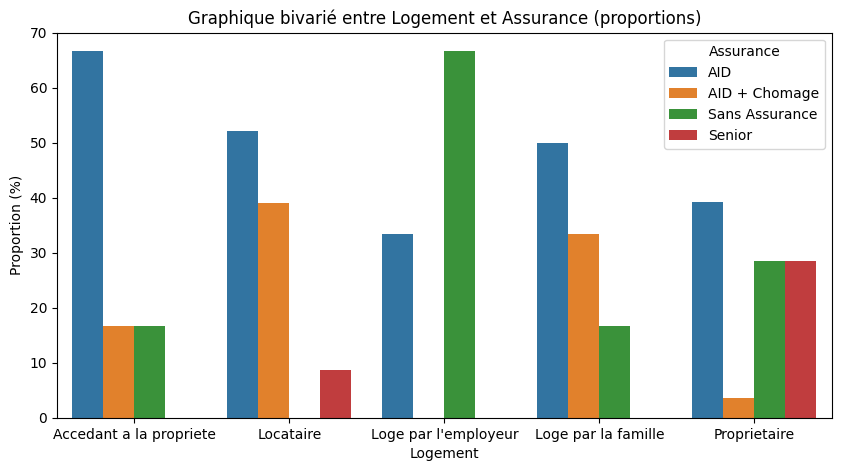

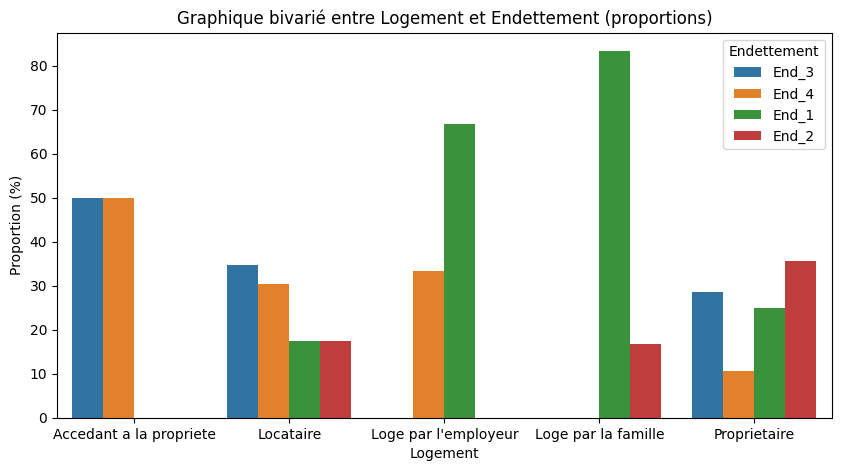

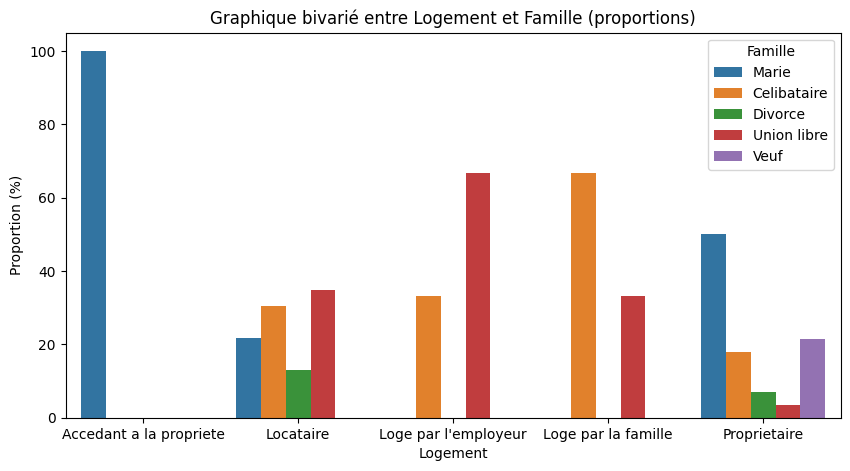

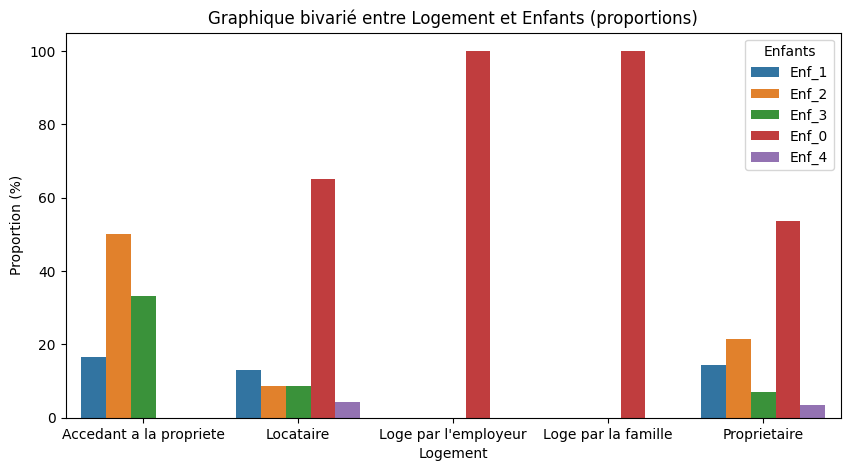

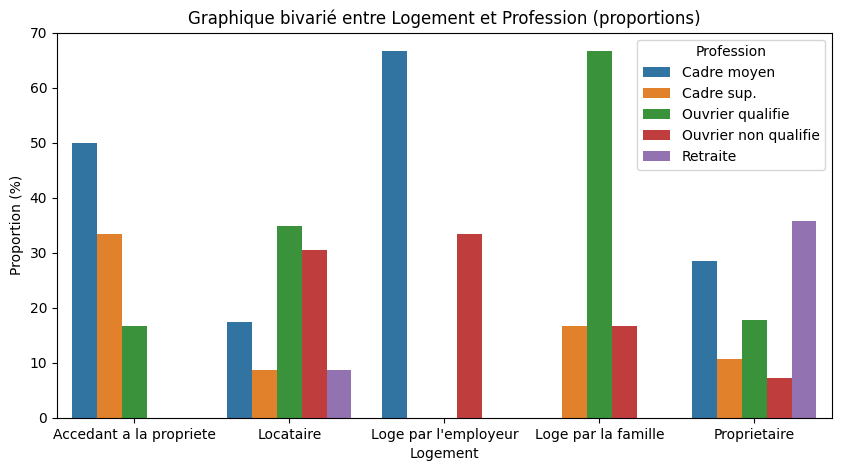

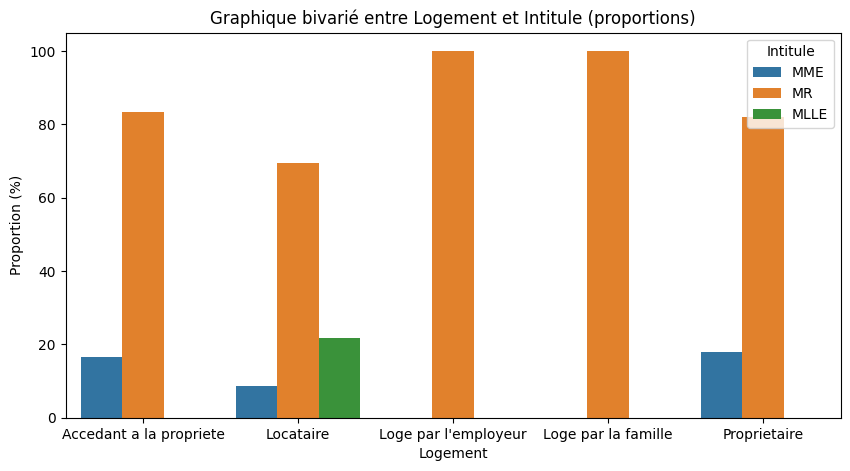

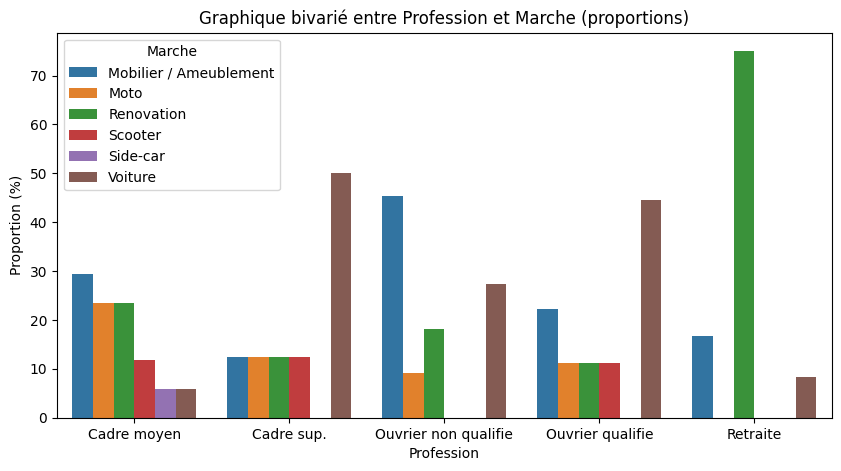

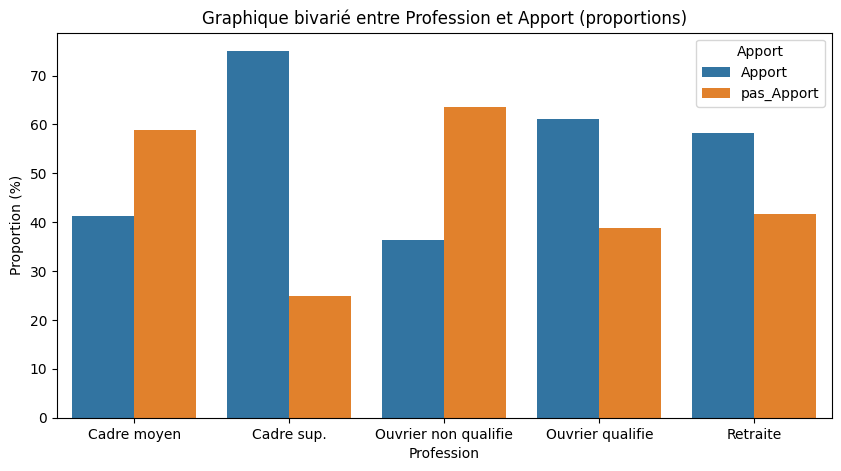

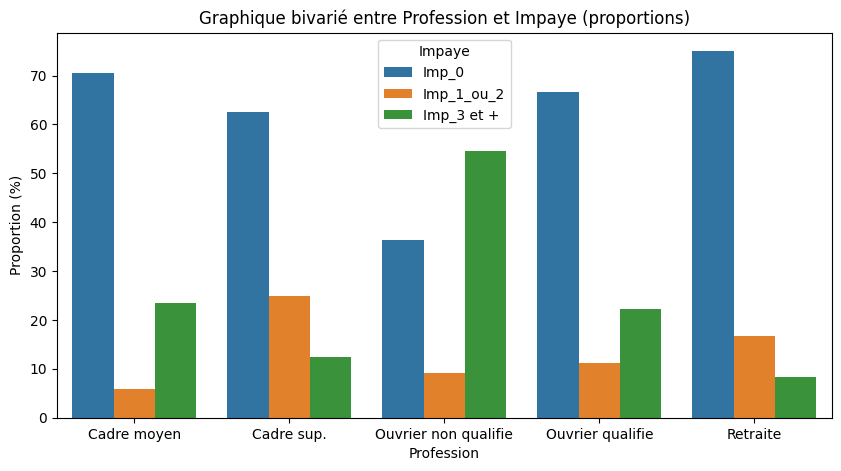

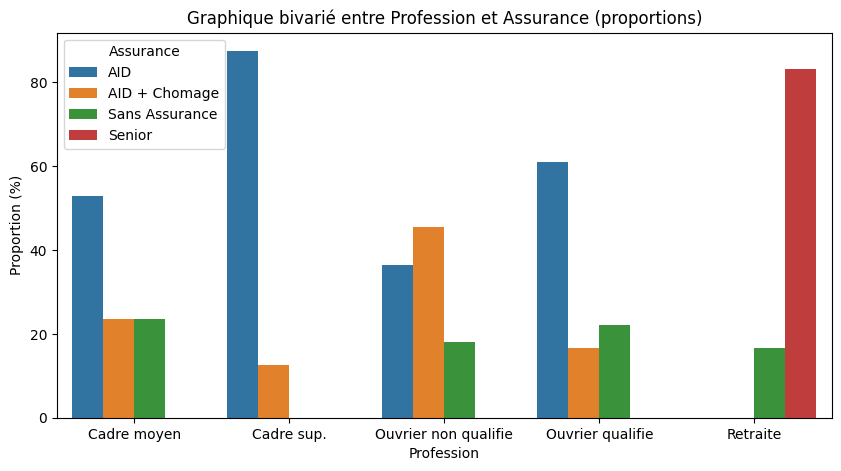

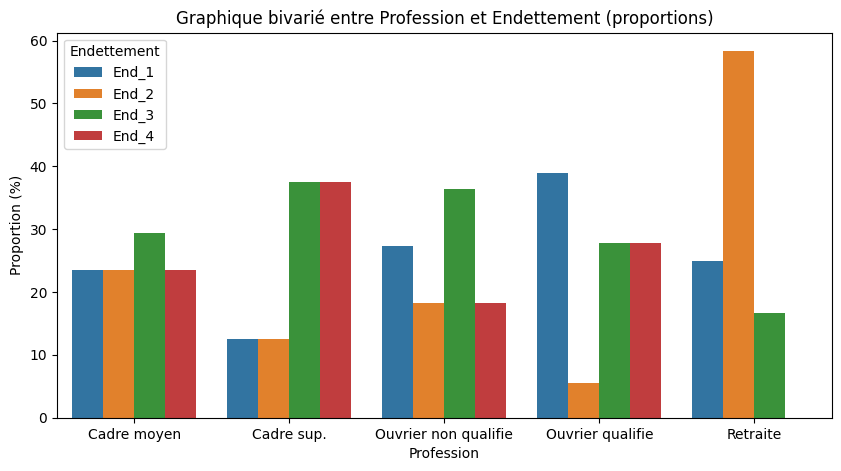

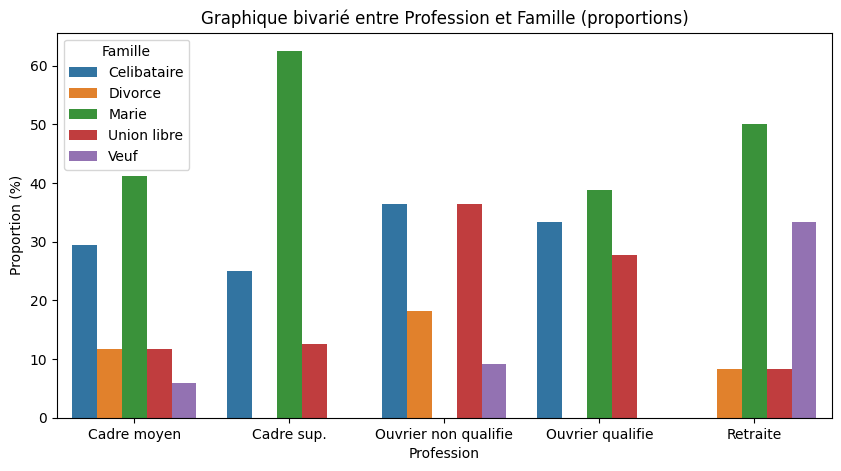

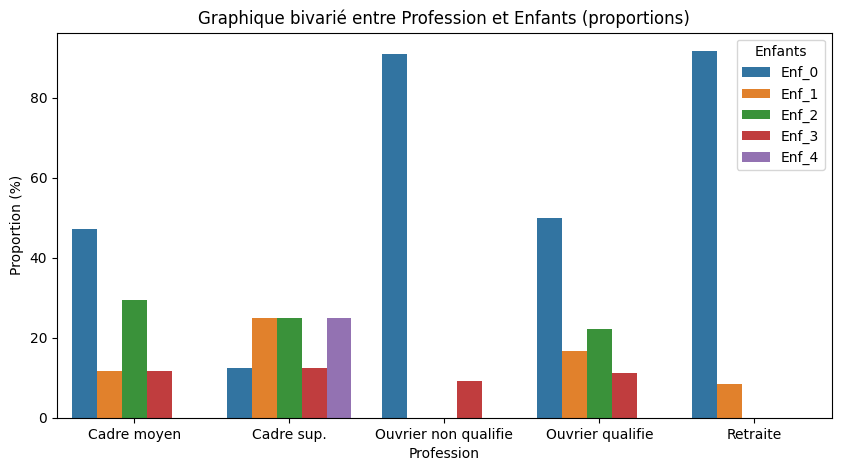

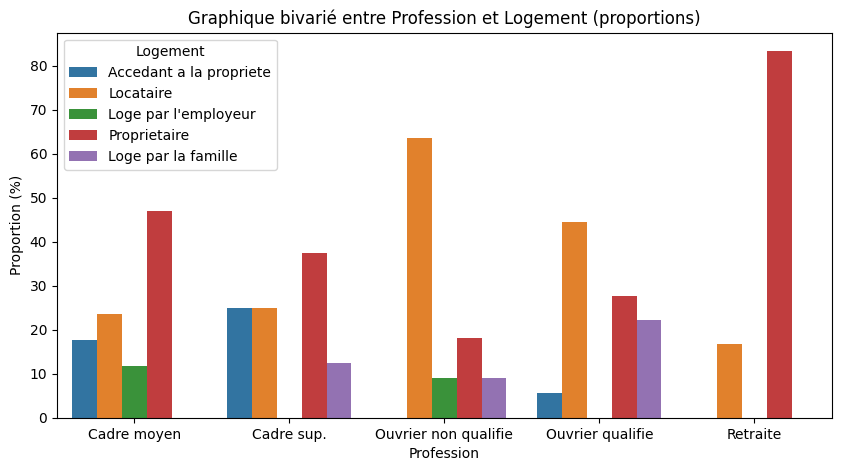

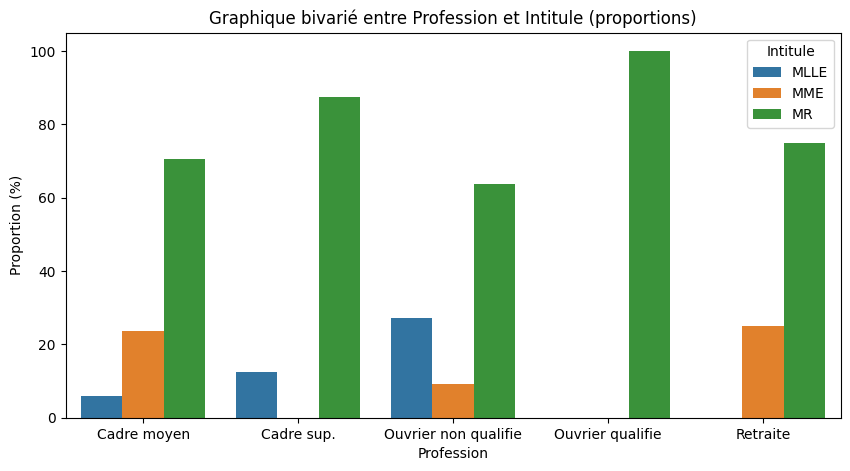

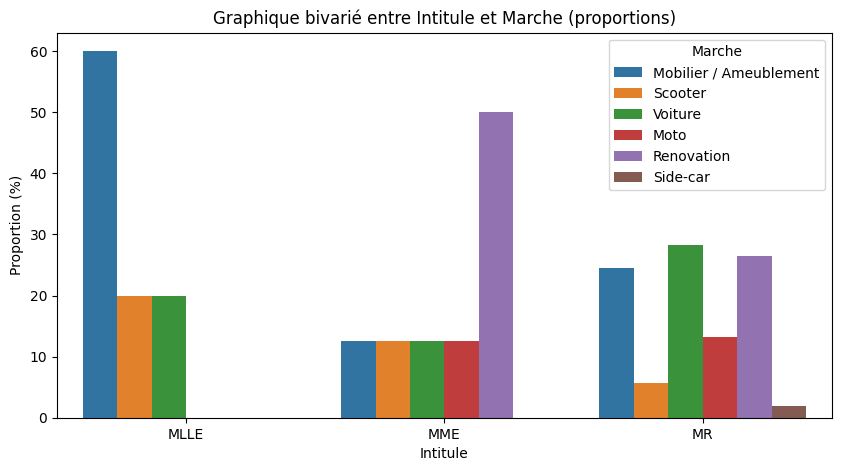

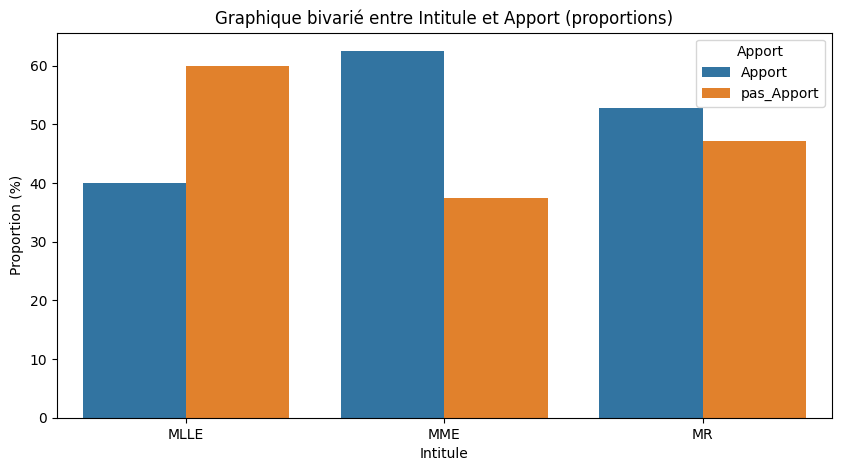

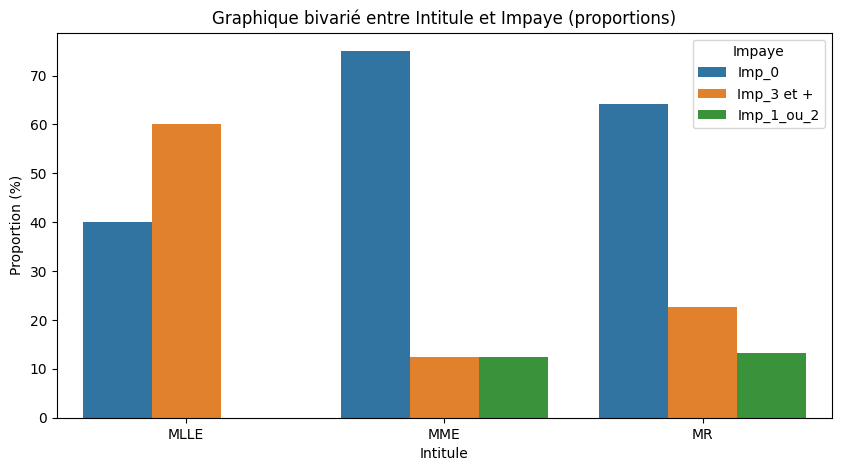

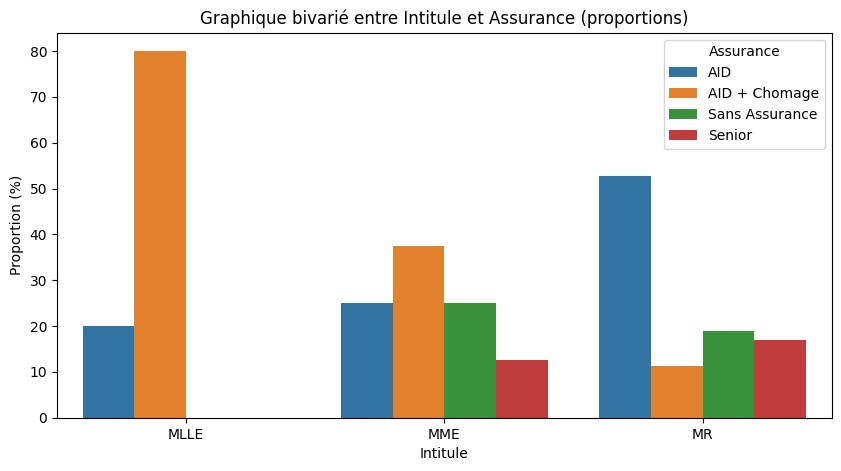

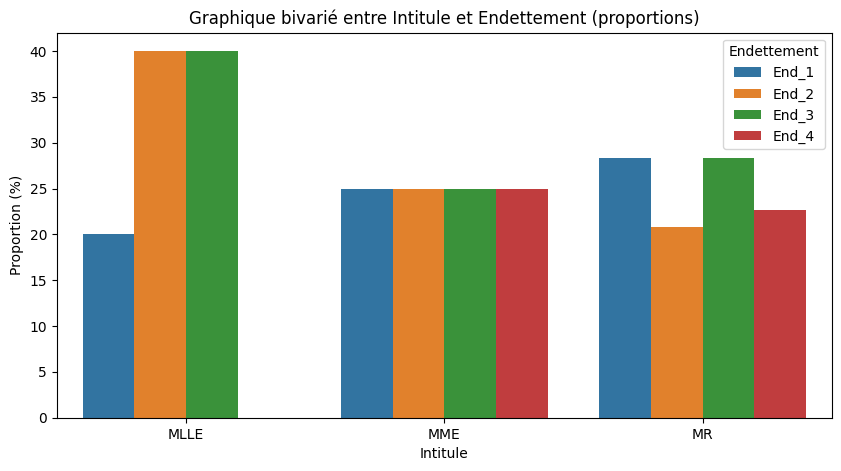

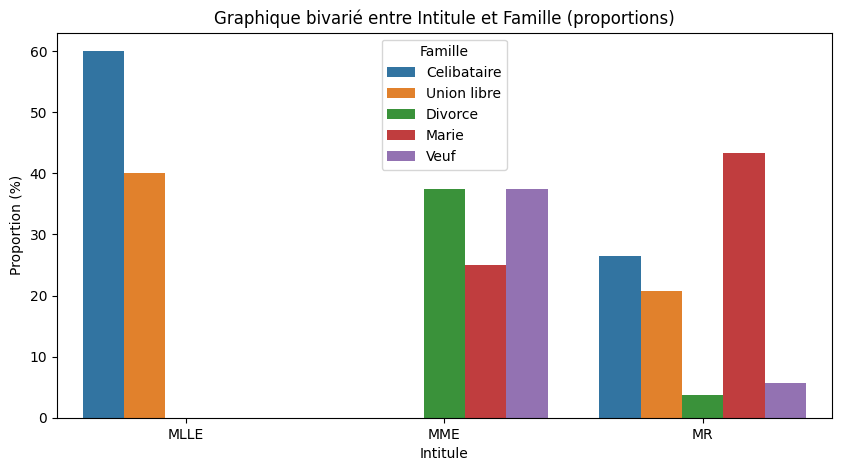

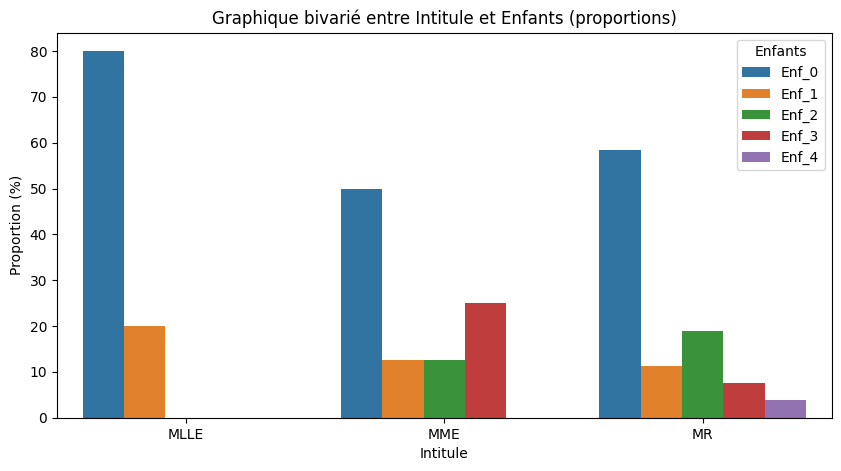

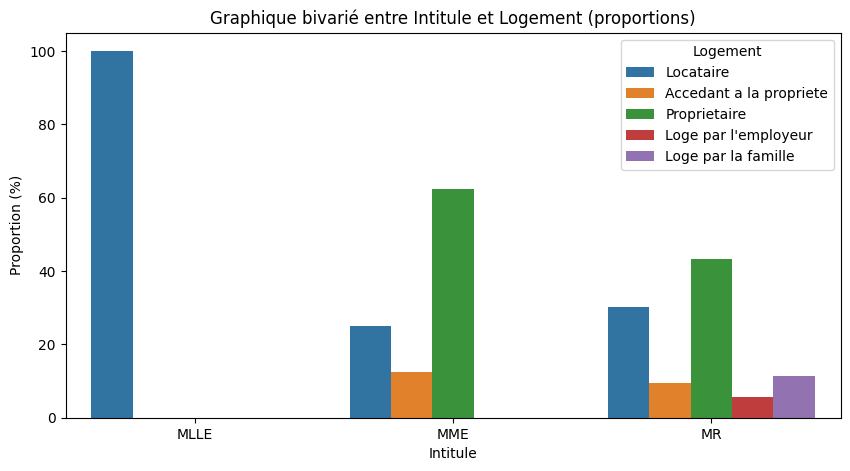

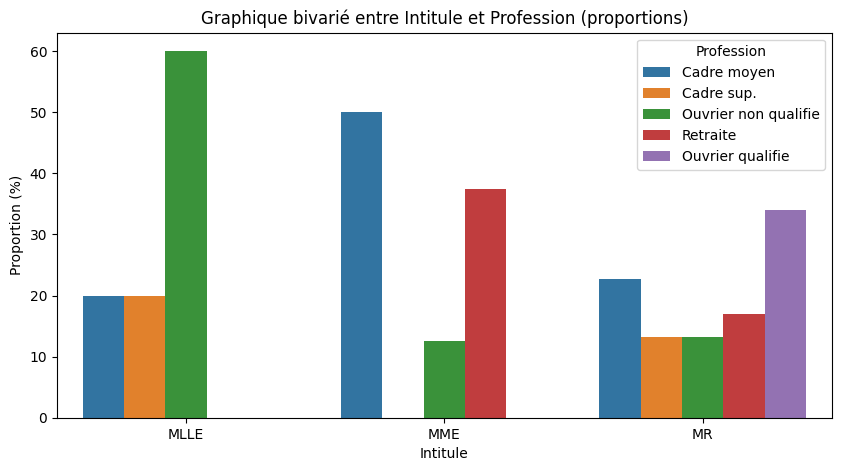

In [24]:
# Liste des variables qualitatives
categorical_columns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']
# Créer des graphiques bivariés pour chaque paire de variables qualitatives
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Calculer les proportions pour le graphique bivarié
            proportions = credit.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()

            LES TEST STATISTIQUES

            TEST P-VALEURS

In [25]:
# Initialiser les DataFrame pour les coefficients de Cramér et les p-values
cramer_v_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
p_value_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
tschuprow_t_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculer le test de chi-deux pour chaque paire de variables qualitatives
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if column1 != column2:
            contingency_table = pd.crosstab(credit[column1], credit[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramer_v = np.sqrt(chi2 / (credit.shape[0] * (min(contingency_table.shape) - 1)))
            tschuprow_t = cramer_v * np.sqrt((contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) / (credit.shape[0] - 1))
            cramer_v_df.loc[column1, column2] = cramer_v
            tschuprow_t_df.loc[column1, column2] = tschuprow_t
            p_value_df.loc[column1, column2] = p

# Afficher la DataFrame des p-values
print("\nDataFrame des p-values :")
p_value_df.style.set_properties(**{'border-color': 'black', 'border-width': '2px', 'border-style': 'solid'})


DataFrame des p-values :


,Marche,Apport,Impaye,Assurance,Endettement,Famille,Enfants,Logement,Profession,Intitule
Marche,nan,0.002566,0.751865,0.019173,0.542668,0.712239,0.626541,0.000221,0.035320,0.539232
Apport,0.002566,nan,0.346020,0.927621,0.576277,0.185990,0.757628,0.975041,0.361529,0.729898
Impaye,0.751865,0.346020,nan,0.243950,0.046660,0.413456,0.012979,0.083970,0.298964,0.353318
Assurance,0.019173,0.927621,0.243950,nan,0.027993,0.056152,0.064280,0.009499,0.000000,0.011626
Endettement,0.542668,0.576277,0.046660,0.027993,nan,0.163073,0.000014,0.011985,0.182384,0.887377
Famille,0.712239,0.185990,0.413456,0.056152,0.163073,nan,0.177295,0.000721,0.031307,0.000350
Enfants,0.626541,0.757628,0.012979,0.064280,0.000014,0.177295,nan,0.225155,0.008371,0.741197
Logement,0.000221,0.975041,0.083970,0.009499,0.011985,0.000721,0.225155,nan,0.026472,0.138006
Profession,0.035320,0.361529,0.298964,0.000000,0.182384,0.031307,0.008371,0.026472,nan,0.036099
Intitule,0.539232,0.729898,0.353318,0.011626,0.887377,0.000350,0.741197,0.138006,0.036099,nan


            COEFFICIENT DE CRAMÉR

In [26]:
# Afficher la DataFrame des coefficients de Cramér
print("DataFrame des coefficients de Cramér :")
cramer_v_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})

DataFrame des coefficients de Cramér :


,Marche,Apport,Impaye,Assurance,Endettement,Famille,Enfants,Logement,Profession,Intitule
Marche,nan,0.526925,0.225580,0.378754,0.263761,0.246725,0.256764,0.435236,0.352580,0.260027
Apport,0.526925,nan,0.179330,0.083471,0.173266,0.306040,0.168821,0.085634,0.256531,0.097678
Impaye,0.225580,0.179330,nan,0.244964,0.311160,0.249357,0.383116,0.324696,0.268807,0.182787
Assurance,0.378754,0.083471,0.244964,nan,0.307208,0.322747,0.319020,0.364969,0.563994,0.352795
Endettement,0.263761,0.173266,0.311160,0.307208,nan,0.290021,0.473058,0.359998,0.286011,0.132754
Famille,0.246725,0.306040,0.249357,0.322747,0.290021,nan,0.282251,0.390368,0.325880,0.466752
Enfants,0.256764,0.168821,0.383116,0.319020,0.473058,0.282251,nan,0.274492,0.351350,0.197564
Logement,0.435236,0.085634,0.324696,0.364969,0.359998,0.390368,0.274492,nan,0.329376,0.305349
Profession,0.352580,0.256531,0.268807,0.563994,0.286011,0.325880,0.351350,0.329376,nan,0.353256
Intitule,0.260027,0.097678,0.182787,0.352795,0.132754,0.466752,0.197564,0.305349,0.353256,nan


        COEFFICIENT DE TCHUPROW

In [95]:
# Afficher la DataFrame des coefficients de Tchuprow
print("\nDataFrame des coefficients de Tchuprow :")
tschuprow_t_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})


DataFrame des coefficients de Tchuprow :


,Marche,Apport,Impaye,Assurance,Endettement,Famille,Enfants,Logement,Profession,Intitule
Marche,nan,0.146143,0.088480,0.181948,0.126707,0.136858,0.142427,0.241425,0.195576,0.101991
Apport,0.146143,nan,0.031457,0.017932,0.037224,0.075919,0.041879,0.021243,0.063638,0.017134
Impaye,0.088480,0.031457,nan,0.074425,0.094537,0.087480,0.134406,0.113911,0.094304,0.045344
Assurance,0.181948,0.017932,0.074425,nan,0.114314,0.138674,0.137073,0.156816,0.242331,0.107187
Endettement,0.126707,0.037224,0.094537,0.114314,nan,0.124613,0.203258,0.154680,0.122890,0.040334
Famille,0.136858,0.075919,0.087480,0.138674,0.124613,nan,0.140036,0.193677,0.161682,0.163748
Enfants,0.142427,0.041879,0.134406,0.137073,0.203258,0.140036,nan,0.136186,0.174318,0.069310
Logement,0.241425,0.021243,0.113911,0.156816,0.154680,0.193677,0.136186,nan,0.163416,0.107123
Profession,0.195576,0.063638,0.094304,0.242331,0.122890,0.161682,0.174318,0.163416,nan,0.123930
Intitule,0.101991,0.017134,0.045344,0.107187,0.040334,0.163748,0.069310,0.107123,0.123930,nan


            TABLEAU DISJONCTIF DES VARIABLES 

In [98]:
# Créer le tableau disjonctif (encodage one-hot)
tableau_disjonctif = pd.get_dummies(df)
#Afficher les premières lignes du tableau disjonctif
print("Tableau disjonctif complet (aperçu) :")
print(tableau_disjonctif.head())
 #Dimensions
print(f"\nDimensions du tableau disjonctif : {tableau_disjonctif.shape}")

Tableau disjonctif complet (aperçu) :
   Age  Marche_Mobilier / Ameublement  Marche_Moto  Marche_Renovation  \
0   50                          False        False               True   
1   40                          False        False               True   
2   30                          False        False              False   
3   60                          False        False               True   
4   20                          False        False              False   

   Marche_Scooter  Marche_Side-car  Marche_Voiture  Apport_Apport  \
0           False            False           False          False   
1           False            False           False          False   
2           False            False            True           True   
3           False            False           False          False   
4            True            False           False           True   

   Apport_pas_Apport  Impaye_Imp_0  ...  Intitule_MLLE  Intitule_MME  \
0               True          True  

        CONSTRUCTION DU NUAGE DES MODALITÉS - ACM (à partir du tableau disjoctif)

1. Affichage des coordonnées des colonnes (modalités)

2. Affichage des Coordonnées des lignes (individus)


	Coordonnées des colonnes (modalités)

                                    0             1
Age__20                 -9.640218e-01  9.707944e-01
Age__30                 -5.633508e-01  1.124374e-01
Age__40                 -3.007889e-01 -2.150099e-01
Age__50                  1.461011e-01 -1.260565e+00
Age__60                  1.881597e+00  5.390266e-01
...                               ...           ...
ages_group_50-59__True   1.461011e-01 -1.260565e+00
ages_group_60-69__False -4.181326e-01 -1.197837e-01
ages_group_60-69__True   1.881597e+00  5.390266e-01
ages_group_70-79__False -3.469447e-18 -1.474515e-16
ages_group_80+__False   -3.469447e-18 -1.474515e-16

[101 rows x 2 columns]

	Coordonnées des lignes (individus)

           0         1
0  -0.006047 -0.054207
1   0.249417 -0.105941
2  -0.226076 -0.363707
3   0.844302  0.210011
4  -0.387930  0.215645
..       ...       ...
61 -0.126857  0.346467
62 -0.174232  0.254957
63 -0.120335  0.123263
64 -0.362391  0.082082
65  0.739525  0.14821

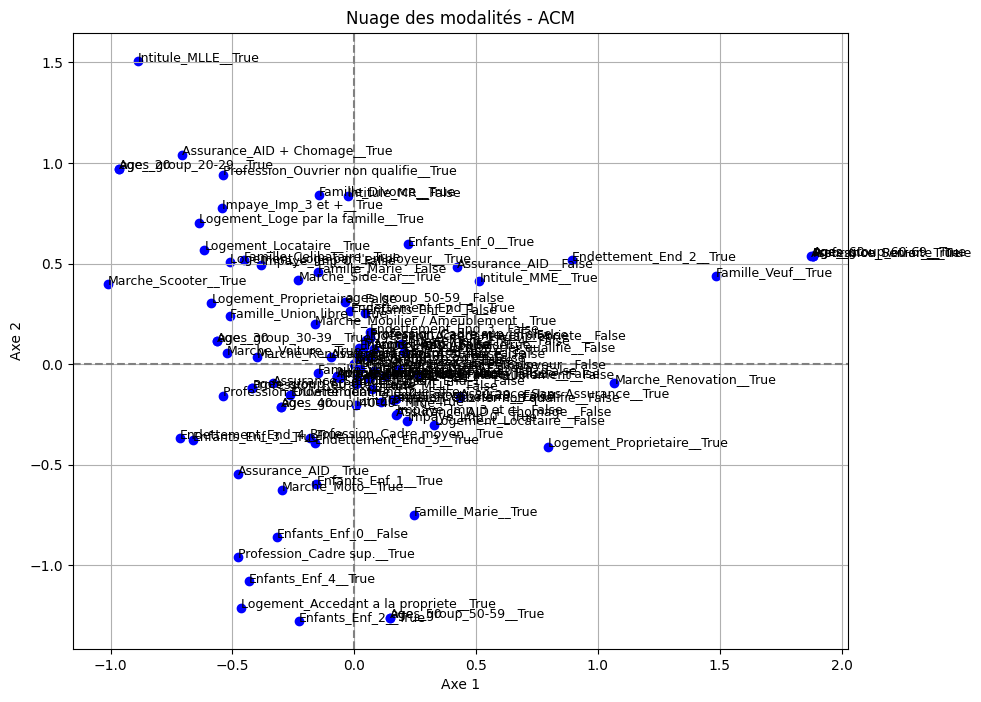

In [ ]:
#  Créer et ajuster l'ACM
acm = prince.MCA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn', 
    random_state=42
)
acm = acm.fit(tableau_disjonctif)

#  Affichage des coordonnées des colonnes (modalités)
print("\n\tCoordonnées des colonnes (modalités)\n")
coords_col = acm.column_coordinates(tableau_disjonctif)
print(coords_col)

#  Affichage des coordonnées des lignes (individus)
print("\n\tCoordonnées des lignes (individus)\n")
coords_row = acm.row_coordinates(tableau_disjonctif)
print(coords_row)

#  Visualisation des modalités
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Nuage des modalités - ACM")
for i, label in enumerate(coords_col.index):
    x, y = coords_col.iloc[i, 0], coords_col.iloc[i, 1]
    ax.scatter(x, y, color='blue')
    ax.text(x, y, label, fontsize=9)
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.grid(True)
plt.show()

        INTREPRETATION GRAPHIQUE

1. Graphique profil ligne

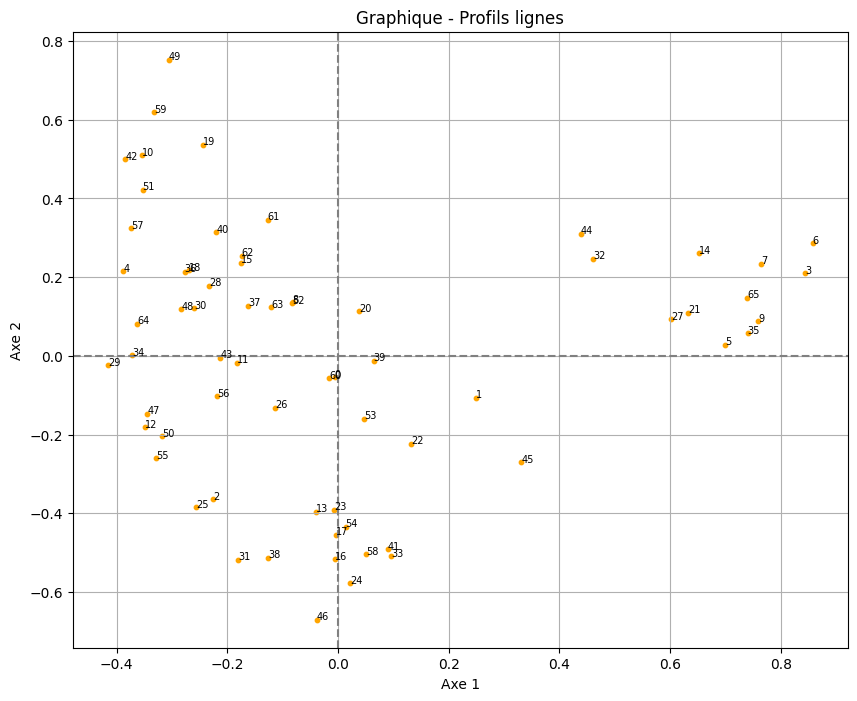

In [108]:
# Visualisation des profils lignes (individus)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Graphique - Profils lignes")

for i, label in enumerate(coords_row.index):
    x, y = coords_row.iloc[i, 0], coords_row.iloc[i, 1]
    ax.scatter(x, y, color='orange', s=10)
    ax.text(x, y, str(label), fontsize=7) 

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.grid(True)
plt.show()

2. Graphique profil colonne

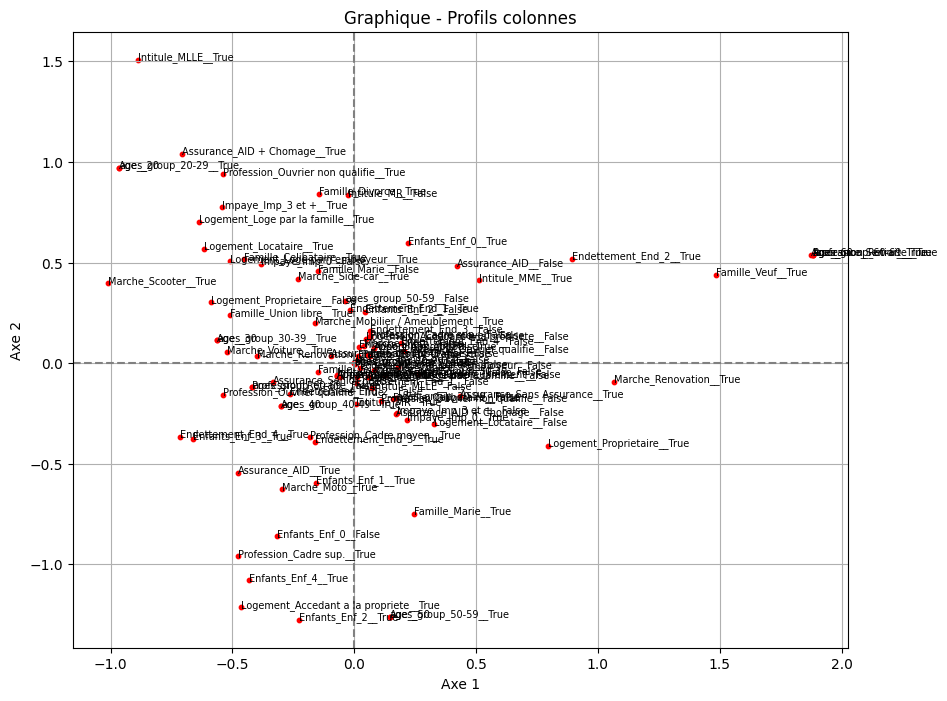

In [110]:
# Visualisation des profils colonnes (modalités)
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Graphique - Profils colonnes")

for i, label in enumerate(coords_col.index):
    x, y = coords_col.iloc[i, 0], coords_col.iloc[i, 1]
    ax.scatter(x, y, color='red', s=10)
    ax.text(x, y, str(label), fontsize=7) 

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.grid(True)
plt.show()